In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('bright')
sns.set_context('notebook', font_scale=1.2)

pd.options.plotting.backend = "plotly" # Setting Plotly as Backend in case I later want to generate an interactive plot. Seaborn will be default for static plots.

 # Import Data

In [2]:
animation = pd.read_csv('Data/Animation.csv')
horror = pd.read_csv('Data/Horror.csv')
scifi = pd.read_csv('Data/SciFi.csv')
thriller = pd.read_csv('Data/Thriller.csv')


# Data Cleanup

## Data Descriptive Statistics and Check for NAs

In [3]:
animation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            8123 non-null   object 
 1   year             8117 non-null   float64
 2   director         7909 non-null   object 
 3   running_time     8123 non-null   int64  
 4   views            8123 non-null   int64  
 5   likes            8123 non-null   int64  
 6   avg_rating       8123 non-null   float64
 7   half_star        8123 non-null   int64  
 8   one_star         8123 non-null   int64  
 9   one_half_star    8123 non-null   int64  
 10  two_star         8123 non-null   int64  
 11  two_half_star    8123 non-null   int64  
 12  three_star       8123 non-null   int64  
 13  three_half_star  8123 non-null   int64  
 14  four_star        8123 non-null   int64  
 15  four_half_star   8123 non-null   int64  
 16  five_star        8123 non-null   int64  
dtypes: float64(2),

In [4]:
animation.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,8123,8117.000000,7909,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
unique,7996,NaN,3630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Wind in the Willows,NaN,Chuck Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1987.235555,NaN,40.215807,5574.548320,1029.206205,3.219993,26.816078,53.858180,49.394189,159.230703,178.719685,494.971808,418.605441,614.074726,218.986458,358.851286
std,NaN,29.929833,NaN,52.810033,32810.409398,7866.939311,0.383906,225.141093,329.424902,271.258463,830.414109,872.042594,2608.639808,2390.891234,4489.385820,1976.451042,3718.157477
min,NaN,1885.000000,NaN,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1961.000000,NaN,7.000000,110.500000,13.000000,3.000000,0.000000,1.000000,1.000000,4.000000,6.000000,13.000000,8.000000,6.000000,1.000000,2.000000
50%,NaN,2000.000000,NaN,13.000000,231.000000,31.000000,3.300000,1.000000,3.000000,3.000000,9.000000,12.000000,28.000000,19.000000,17.000000,4.000000,6.000000
75%,NaN,2013.000000,NaN,75.500000,740.000000,108.000000,3.400000,5.000000,9.000000,9.000000,25.000000,34.000000,83.000000,64.000000,60.000000,16.000000,24.000000


In [5]:
horror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            11052 non-null  object 
 1   year             11046 non-null  float64
 2   director         10976 non-null  object 
 3   running_time     11052 non-null  int64  
 4   views            11052 non-null  int64  
 5   likes            11052 non-null  int64  
 6   avg_rating       11052 non-null  float64
 7   half_star        11052 non-null  int64  
 8   one_star         11052 non-null  int64  
 9   one_half_star    11052 non-null  int64  
 10  two_star         11052 non-null  int64  
 11  two_half_star    11052 non-null  int64  
 12  three_star       11052 non-null  int64  
 13  three_half_star  11052 non-null  int64  
 14  four_star        11052 non-null  int64  
 15  four_half_star   11052 non-null  int64  
 16  five_star        11052 non-null  int64  
dtypes: float64(2

In [6]:
horror.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,11052,11046.000000,10976,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000
unique,10339,NaN,6826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,David DeCoteau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1997.829712,NaN,83.197883,4344.529406,823.853782,2.810062,52.435215,99.525606,93.569399,234.609482,241.492038,511.017101,422.037821,507.563156,169.017644,214.110297
std,NaN,20.641835,NaN,28.903248,22098.558663,6153.743060,0.461166,237.354295,394.178772,345.956247,888.161944,899.024736,2229.331836,2211.361403,3773.986745,1676.276906,2646.450847
min,NaN,1895.000000,NaN,1.000000,34.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1986.000000,NaN,80.000000,104.000000,10.000000,2.500000,2.000000,5.000000,5.000000,9.000000,8.000000,11.000000,5.000000,3.000000,0.000000,1.000000
50%,NaN,2006.000000,NaN,89.000000,277.000000,31.000000,2.800000,7.000000,13.000000,13.000000,25.000000,24.000000,33.000000,17.000000,11.000000,2.000000,3.000000
75%,NaN,2014.000000,NaN,95.000000,1110.250000,148.000000,3.100000,22.000000,40.000000,41.000000,93.000000,96.000000,157.000000,90.000000,61.000000,12.000000,14.000000


In [7]:
scifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5827 non-null   object 
 1   year             5823 non-null   float64
 2   director         5779 non-null   object 
 3   running_time     5827 non-null   int64  
 4   views            5827 non-null   int64  
 5   likes            5827 non-null   int64  
 6   avg_rating       5827 non-null   float64
 7   half_star        5827 non-null   int64  
 8   one_star         5827 non-null   int64  
 9   one_half_star    5827 non-null   int64  
 10  two_star         5827 non-null   int64  
 11  two_half_star    5827 non-null   int64  
 12  three_star       5827 non-null   int64  
 13  three_half_star  5827 non-null   int64  
 14  four_star        5827 non-null   int64  
 15  four_half_star   5827 non-null   int64  
 16  five_star        5827 non-null   int64  
dtypes: float64(2),

In [8]:
scifi.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,5827,5823.000000,5779,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
unique,5640,NaN,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,Ishirō Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1996.500429,NaN,85.318002,12432.362966,2469.437275,2.898387,109.180196,229.080316,206.881414,579.137635,575.518277,1329.661919,1058.524455,1426.026944,499.093015,740.281105
std,NaN,20.592035,NaN,37.434474,53452.425040,14479.067824,0.511744,617.083835,1102.621337,881.745149,2359.063044,2210.382857,5530.382149,4705.722622,8070.482505,3499.584214,6229.123148
min,NaN,1895.000000,NaN,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1985.000000,NaN,78.000000,119.000000,13.000000,2.600000,1.000000,4.000000,4.000000,9.000000,8.000000,13.000000,6.000000,4.000000,1.000000,1.000000
50%,NaN,2003.000000,NaN,90.000000,333.000000,42.000000,2.900000,6.000000,12.000000,12.000000,26.000000,24.000000,38.000000,21.000000,16.000000,3.000000,5.000000
75%,NaN,2013.000000,NaN,100.000000,1831.000000,239.500000,3.300000,25.000000,52.000000,55.000000,123.500000,137.000000,237.000000,141.000000,110.000000,23.000000,31.000000


In [9]:
thriller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12836 entries, 0 to 12835
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            12836 non-null  object 
 1   year             12833 non-null  float64
 2   director         12802 non-null  object 
 3   running_time     12836 non-null  int64  
 4   views            12836 non-null  int64  
 5   likes            12836 non-null  int64  
 6   avg_rating       12836 non-null  float64
 7   half_star        12836 non-null  int64  
 8   one_star         12836 non-null  int64  
 9   one_half_star    12836 non-null  int64  
 10  two_star         12836 non-null  int64  
 11  two_half_star    12836 non-null  int64  
 12  three_star       12836 non-null  int64  
 13  three_half_star  12836 non-null  int64  
 14  four_star        12836 non-null  int64  
 15  four_half_star   12836 non-null  int64  
 16  five_star        12836 non-null  int64  
dtypes: float64(2

In [10]:
thriller.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,12836,12833.000000,12802,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000
unique,11990,NaN,7668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Missing,NaN,Alfred Hitchcock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.998831,NaN,98.254986,7473.757089,1422.891088,2.938969,54.903007,118.423496,117.293316,328.195700,355.639140,812.383998,723.173185,948.507012,357.502805,428.523605
std,NaN,20.167857,NaN,25.973443,32415.529590,9362.125019,0.447462,281.126271,494.097765,432.564697,1148.446012,1172.661312,2939.661636,2946.029343,5475.450129,2816.761870,4722.109520
min,NaN,1902.000000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1989.000000,NaN,88.000000,110.000000,10.000000,2.700000,1.000000,3.000000,4.000000,10.000000,10.000000,14.000000,7.000000,4.000000,0.000000,1.000000
50%,NaN,2007.000000,NaN,95.000000,339.000000,35.500000,3.000000,5.000000,10.000000,11.000000,27.000000,29.000000,48.000000,28.000000,18.000000,3.000000,4.000000
75%,NaN,2014.000000,NaN,107.000000,1826.000000,222.000000,3.200000,18.000000,39.000000,44.000000,117.000000,139.000000,264.000000,183.000000,129.000000,24.000000,25.000000


## Dealing with Missing Values

In all 4 datasets, number of observations that contain missing values are minimal, so I'll delete them.

In [11]:
animation.dropna(axis=0, inplace=True)
horror.dropna(axis=0, inplace=True)
scifi.dropna(axis=0, inplace=True)
thriller.dropna(axis=0, inplace=True)

## Data Wrangling

Datasets contain short films and series. I only want to analyze feature films, so I'll cut running time to the 50 - 240 min interval

In [12]:
animation = animation[(50 <= animation.running_time) & (animation.running_time <= 240)]

In [13]:
animation.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,2766,2766.000000,2766,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000
unique,2747,NaN,1809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Little Mermaid,NaN,Kunihiko Yuyama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2003.248373,NaN,86.032538,14910.309834,2774.068691,3.129537,71.213666,145.368402,132.734273,429.454808,474.181490,1311.323572,1107.255604,1646.425524,592.789588,975.857918
std,NaN,14.357013,NaN,21.119423,54872.326052,13281.793063,0.479276,380.219172,551.975774,452.393491,1381.099729,1445.804346,4343.142498,3994.343094,7564.221355,3348.985446,6315.025111
min,NaN,1926.000000,NaN,50.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1996.000000,NaN,74.000000,151.000000,18.000000,2.900000,1.000000,2.000000,2.000000,7.000000,8.000000,17.000000,11.000000,9.000000,2.000000,4.000000
50%,NaN,2007.000000,NaN,85.000000,521.000000,69.500000,3.200000,4.000000,9.000000,9.000000,23.000000,28.000000,59.000000,40.000000,35.500000,8.000000,15.000000
75%,NaN,2014.000000,NaN,95.000000,3124.000000,451.500000,3.400000,23.000000,47.750000,53.000000,142.750000,171.750000,348.750000,254.750000,243.000000,55.000000,90.750000


In [14]:
# Remove Over the Garden Wall and FLCL cause they are series.

animation.drop([25, 90], axis=0, inplace=True)

In [15]:
horror = horror[(50 <= horror.running_time) & (horror.running_time <= 240)]

In [16]:
horror.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,9878,9878.000000,9878,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000
unique,9286,NaN,6158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Phantom of the Opera,NaN,Jesús Franco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1997.578052,NaN,90.489876,4787.935412,908.379632,2.766096,58.117331,110.417696,103.816258,260.094554,267.169265,563.759364,465.421745,559.784774,186.869306,236.239421
std,NaN,19.665084,NaN,14.409087,23320.841156,6502.046283,0.454086,250.413214,415.571849,364.558198,936.111236,947.518758,2351.715048,2334.392366,3987.211348,1771.842104,2797.768745
min,NaN,1911.000000,NaN,50.000000,34.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1985.000000,NaN,83.000000,109.000000,10.000000,2.500000,2.000000,6.000000,6.000000,11.000000,9.000000,11.000000,5.000000,3.000000,0.000000,1.000000
50%,NaN,2005.000000,NaN,90.000000,303.000000,33.000000,2.800000,8.000000,15.000000,15.000000,30.000000,28.000000,36.000000,18.000000,11.000000,2.000000,3.000000
75%,NaN,2014.000000,NaN,96.000000,1278.000000,164.000000,3.100000,25.000000,47.000000,48.000000,108.000000,115.000000,184.000000,104.000000,66.750000,12.000000,15.000000


In [17]:
scifi = scifi[(50 <= scifi.running_time) & (scifi.running_time <= 240)]

In [18]:
scifi.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,5011,5011.000000,5011,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
unique,4871,NaN,3430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,Ishirō Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1995.614648,NaN,94.933546,14216.274995,2830.896228,2.843983,125.773498,263.900818,238.214528,665.880263,659.455398,1520.373379,1208.969467,1630.885452,571.590700,848.276791
std,NaN,19.625673,NaN,20.580929,57383.483951,15576.272124,0.513865,663.797762,1184.964283,946.713821,2531.601316,2370.422914,5936.061169,5053.193002,8678.647603,3766.444011,6707.624285
min,NaN,1916.000000,NaN,50.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1984.000000,NaN,85.000000,129.000000,13.000000,2.500000,2.000000,5.000000,5.000000,10.000000,9.000000,13.000000,6.000000,4.000000,1.000000,1.000000
50%,NaN,2000.000000,NaN,92.000000,383.000000,46.000000,2.900000,8.000000,16.000000,16.000000,33.000000,29.000000,43.000000,23.000000,16.000000,3.000000,5.000000
75%,NaN,2012.000000,NaN,101.000000,2326.500000,298.000000,3.200000,32.000000,69.000000,70.000000,170.000000,175.500000,298.000000,180.000000,130.000000,26.000000,37.000000


In [19]:
thriller = thriller[(50 <= thriller.running_time) & (thriller.running_time <= 240) & (thriller.year < 2021)]

#Removing 2021 (to be released) from thriller

In [20]:
thriller.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,12450,12450.000000,12450,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000,12450.000000
unique,11641,NaN,7415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rage,NaN,Alfred Hitchcock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.789960,NaN,99.957510,7658.063614,1460.375341,2.930177,56.352048,121.519357,120.379598,336.545863,364.349960,831.772610,740.644016,972.594779,367.080884,440.363614
std,NaN,20.109216,NaN,18.934851,32876.474930,9502.537210,0.447649,285.237124,501.058344,438.536947,1163.786358,1187.836322,2979.189883,2987.179619,5556.167893,2859.217368,4794.119138
min,NaN,1913.000000,NaN,50.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1989.000000,NaN,89.000000,112.000000,10.000000,2.700000,1.000000,3.000000,4.000000,10.000000,10.000000,14.000000,7.000000,4.000000,0.000000,1.000000
50%,NaN,2006.000000,NaN,96.000000,353.000000,36.000000,3.000000,5.000000,11.000000,11.000000,28.000000,30.000000,50.000000,29.000000,18.000000,3.000000,4.000000
75%,NaN,2014.000000,NaN,108.000000,1897.500000,231.000000,3.200000,19.000000,41.000000,46.000000,124.000000,145.000000,278.000000,191.000000,136.000000,25.000000,25.000000


# Data Exploration and Analysis

In [21]:
animation['year'] = animation['year'].astype(int)
horror['year'] = horror['year'].astype(int)
scifi['year'] = scifi['year'].astype(int)
thriller['year'] = thriller['year'].astype(int)

In [22]:
#Extracting descriptive statistics for each genre's avg_rating distribution
animation_rating_mean = round(animation['avg_rating'].mean(), 2)
animation_rating_std = round(animation['avg_rating'].std(), 2)
animation_rating_skp = round(animation['avg_rating'].skew(), 2)

horror_rating_mean = round(horror['avg_rating'].mean(), 2)
horror_rating_std = round(horror['avg_rating'].std(), 2)
horror_rating_skp = round(horror['avg_rating'].skew(), 2)

scifi_rating_mean = round(scifi['avg_rating'].mean(), 2)
scifi_rating_std = round(scifi['avg_rating'].std(), 2)
scifi_rating_skp = round(scifi['avg_rating'].skew(), 2)

thriller_rating_mean = round(thriller['avg_rating'].mean(), 2)
thriller_rating_std = round(thriller['avg_rating'].std(), 2)
thriller_rating_skp = round(thriller['avg_rating'].skew(), 2)

In [23]:
#total movies
animation_n_movies = len(animation)
horror_n_movies = len(horror)
scifi_n_movies = len(scifi)
thriller_n_movies = len(thriller)

## Average Rating Distribution


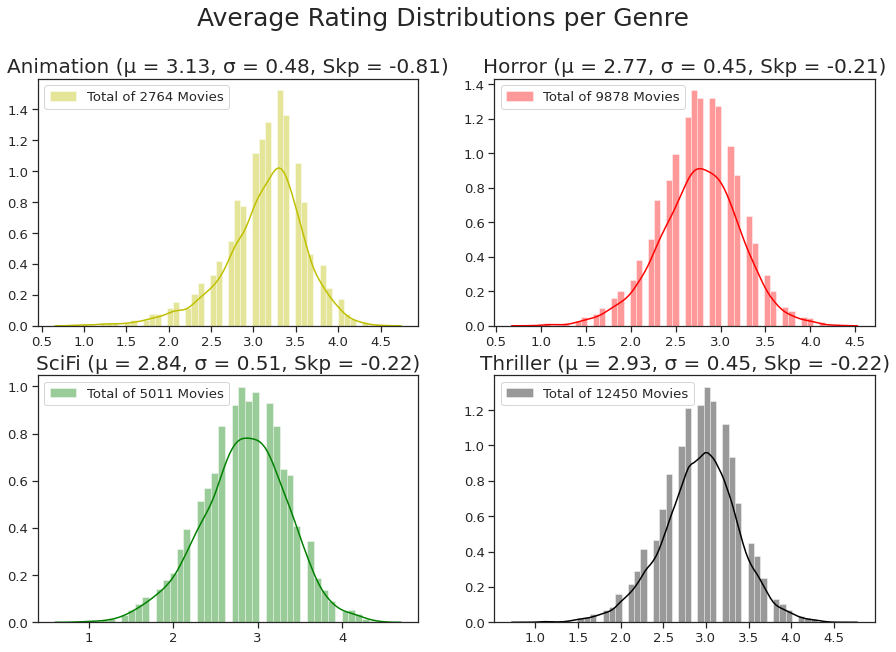

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Average Rating Distributions per Genre', fontsize=25)

sns.distplot(animation.avg_rating, ax=axes[0,0], norm_hist=True,
             color='y', axlabel=False, label=f'Total of {animation_n_movies} Movies')
axes[0,0].set_title(f'Animation (μ = {animation_rating_mean}, σ = {animation_rating_std}, Skp = {animation_rating_skp})',
                    fontsize=20)
axes[0,0].legend(loc='upper left')

sns.distplot(horror.avg_rating, ax=axes[0,1], norm_hist=True,
             color='r', axlabel=False, label=f'Total of {horror_n_movies} Movies')
axes[0,1].set_title(f'Horror (μ = {horror_rating_mean}, σ = {horror_rating_std}, Skp = {horror_rating_skp})',
                    fontsize=20)
axes[0,1].legend(loc='upper left')

sns.distplot(scifi.avg_rating, ax=axes[1,0], norm_hist=True,
             color='g', axlabel=False, label=f'Total of {scifi_n_movies} Movies')
axes[1,0].set_title(f'SciFi (μ = {scifi_rating_mean}, σ = {scifi_rating_std}, Skp = {scifi_rating_skp})',
                    fontsize=20)
axes[1,0].legend(loc='upper left')

sns.distplot(thriller.avg_rating, ax=axes[1,1], norm_hist=True,
             color='k', axlabel=False, label=f'Total of {thriller_n_movies} Movies')
axes[1,1].set_title(f'Thriller (μ = {thriller_rating_mean}, σ = {thriller_rating_std}, Skp = {thriller_rating_skp})', fontsize=20)
axes[1,1].legend(loc='upper left')

plt.savefig('Figures/Avg_Rating_Distplot.png')
plt.show()

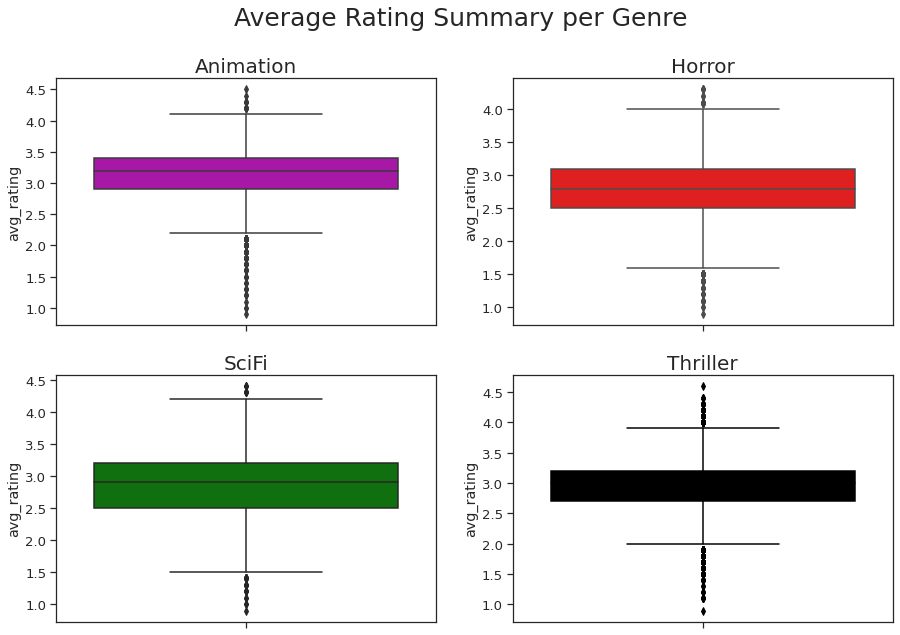

In [25]:
#Visualizing Outliers

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Average Rating Summary per Genre', fontsize=25)

sns.boxplot(animation.avg_rating, ax=axes[0,0], color='m', orient='v')
axes[0,0].set_title('Animation', fontsize=20)

sns.boxplot(horror.avg_rating, ax=axes[0,1], color='r', orient='v')
axes[0,1].set_title('Horror', fontsize=20)

sns.boxplot(scifi.avg_rating, ax=axes[1,0], color='g', orient='v')
axes[1,0].set_title('SciFi', fontsize=20)

sns.boxplot(thriller.avg_rating, ax=axes[1,1], color='k', orient='v')
axes[1,1].set_title('Thriller', fontsize=20)

plt.show()

### Movies with Outlier Score per Each Genre

Names and Stats for movies that can be considered outliers within their Genres

In [26]:
def outlier_fences(df, col):
    """Calculates the fence values to determine Outliers
    
    df: is a dataframe
    col: is the column header
    
    returns: List with upper and lower fence values"""
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3 - q1
    
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    return [lower, upper]

#### Animation Outliers
  


In [27]:
anim_fences = outlier_fences(animation, 'avg_rating')

In [28]:
worst_rated_anim = animation[animation.avg_rating < anim_fences[0]]
worst_rated_anim.sort_values('avg_rating').head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
7723,Foodfight!,2012,Lawrence Kasanoff,87,6828,437,0.9,3533,608,101,65,38,26,19,25,11,184
7169,Titanic: The Legend Goes On...,2001,Camillo Teti,90,1570,69,1.0,636,176,32,23,10,8,8,3,4,32
7613,Norm of the North,2016,Trevor Wall,86,4304,108,1.0,1809,612,175,135,59,67,18,21,5,66
6927,The Little Panda Fighter,2008,Michelle Gabriel,51,1045,74,1.1,546,105,14,17,4,5,1,2,1,36
7465,The Amazing Bulk,2012,Lewis Schoenbrun,76,2536,297,1.2,1186,276,58,43,14,24,17,26,12,158


In [29]:
best_rated_anim = animation[animation.avg_rating > anim_fences[1]]
best_rated_anim.sort_values('avg_rating').sort_values('avg_rating', ascending=False)

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
8119,Spirited Away,2001,Hayao Miyazaki,125,437759,178080,4.5,257,512,291,1687,1760,10355,14469,56612,43915,121555
0,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471600,232066,4.4,275,585,329,1929,2184,13931,22173,84347,71034,151015
5,Princess Mononoke,1997,Hayao Miyazaki,134,214237,76679,4.3,84,187,145,900,1216,6549,10927,32934,25078,43308
8028,Neon Genesis Evangelion: The End of Evangelion,1997,"Hideaki Anno,Kazuya Tsurumaki",87,54217,19992,4.3,127,157,156,412,546,1843,2449,6910,5789,13323
8039,It's Such a Beautiful Day,2012,Don Hertzfeldt,62,35875,13329,4.3,56,114,78,306,339,1343,1940,5275,4326,8397
8091,Perfect Blue,1997,Satoshi Kon,81,91101,35405,4.3,47,114,92,434,681,3012,5844,17688,13882,17324
8095,Grave of the Fireflies,1988,Isao Takahata,89,126525,40588,4.3,112,183,168,704,966,3760,6235,18915,15316,27127
11,Your Name.,2016,Makoto Shinkai,106,175635,68673,4.2,257,387,425,1701,2305,8738,13399,31838,22584,37559
18,Howl's Moving Castle,2004,Hayao Miyazaki,119,207310,70875,4.2,69,200,232,1125,1828,8763,15046,34983,18480,32457
7292,Rilakkuma and Kaoru,2019,Masahito Kobayashi,151,1245,519,4.2,0,2,3,5,9,41,84,233,110,241


#### Horror Outliers

In [30]:
horror_fences = outlier_fences(horror, 'avg_rating')

In [31]:
worst_rated_horror = horror[horror.avg_rating < horror_fences[0]]
worst_rated_horror.sort_values('avg_rating').sort_values('avg_rating').head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
761,Potato Salad: Don't Ask!,2015,Michael David Pate,81,1296,18,0.9,770,148,41,24,11,6,3,4,0,12
703,Jurassic Shark,2012,Brett Kelly,75,1032,39,1.0,490,141,32,22,6,10,2,3,2,9
9445,Fred 2: Night of the Living Fred,2011,John Fortenberry,84,4260,150,1.0,1474,647,133,109,60,67,22,11,1,46
8412,Romina,2018,Diego Cohen,74,1006,24,1.1,413,194,74,48,23,16,3,6,0,3
8518,American Poltergeist,2015,Mike Rutkowski,77,1089,33,1.1,483,173,45,50,9,18,1,5,0,10


In [32]:
best_rated_horror = horror[horror.avg_rating > horror_fences[1]]
best_rated_horror.sort_values('avg_rating').sort_values('avg_rating', ascending=False)

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
11046,The Silence of the Lambs,1991,Jonathan Demme,119,482939,161110,4.3,148,365,259,1727,1904,14691,20634,80047,51372,92363
11041,Alien,1979,Ridley Scott,117,379504,130782,4.3,146,442,299,1973,1963,13696,17644,60265,38066,81281
11039,Psycho,1960,Alfred Hitchcock,109,323090,101065,4.3,85,229,167,1161,1335,10300,13792,50703,33030,63548
7,The Thing,1982,John Carpenter,109,215480,78005,4.3,112,324,247,1339,1539,8292,12174,35860,24541,48856
11049,The Shining,1980,Stanley Kubrick,144,535777,196151,4.3,463,1016,610,3798,3328,20073,22634,82486,52363,123437
4,Rosemary's Baby,1968,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435
8827,In Just the Wink of an Eye,1981,Mike de Leon,98,276,105,4.2,0,0,0,1,0,9,12,39,43,58
11044,Jaws,1975,Steven Spielberg,124,354355,88582,4.1,294,990,554,3792,3510,20468,21237,51850,23165,49721
11051,The Lighthouse,2019,Robert Eggers,109,237969,93329,4.1,564,1182,849,3895,4514,14861,21755,54557,38452,50018
9797,National Theatre Live: Frankenstein,2011,"Danny Boyle,Tim Van Someren",239,2950,838,4.1,4,8,7,25,30,126,244,661,361,368


#### Sci-Fi Outliers

In [33]:
scifi_fences = outlier_fences(scifi, 'avg_rating')

In [34]:
worst_rated_scifi = scifi[scifi.avg_rating < scifi_fences[0]]
worst_rated_scifi.sort_values('avg_rating').sort_values('avg_rating').head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
5380,Dragonball Evolution,2009,James Wong,85,25282,350,0.9,9251,3144,831,722,241,211,43,44,6,72
323,Atlantic Rim,2013,Jared Cohn,85,2060,66,1.0,733,384,98,64,28,29,10,8,3,7
4387,Jurassic Shark,2012,Brett Kelly,75,1032,39,1.0,490,141,32,22,6,10,2,3,2,9
132,Battlefield Earth,2000,Roger Christian,118,16915,511,1.1,4627,2539,712,602,238,261,103,78,24,96
4783,Birdemic 2: The Resurrection,2013,James Nguyen,82,2415,162,1.1,1028,252,56,53,35,33,17,30,12,49


In [35]:
best_rated_scifi = scifi[scifi.avg_rating > scifi_fences[1]]
best_rated_scifi.sort_values('avg_rating').sort_values('avg_rating', ascending=False)

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471056,231832,4.4,275,585,330,1923,2178,13916,22153,84260,70990,150869
9,The Empire Strikes Back,1980,Irvin Kershner,124,506762,180467,4.4,228,473,268,1861,2023,15036,16978,62922,44127,127552
5760,Stalker,1979,Andrey Tarkovsky,162,80202,28967,4.4,121,220,211,596,691,2314,3277,9860,9856,23385
1,Alien,1979,Ridley Scott,117,379337,130733,4.3,145,442,299,1974,1961,13690,17632,60239,38044,81236
12,2001: A Space Odyssey,1968,Stanley Kubrick,149,339349,117398,4.3,767,1662,863,3863,2860,12669,12115,38334,28574,94504
5652,Neon Genesis Evangelion: The End of Evangelion,1997,"Hideaki Anno,Kazuya Tsurumaki",87,54131,19965,4.3,127,157,156,412,543,1840,2445,6900,5774,13306
5787,The Thing,1982,John Carpenter,109,215385,77971,4.3,112,324,247,1337,1538,8285,12168,35842,24522,48840
5811,Star Wars,1977,George Lucas,121,548822,189813,4.3,317,723,411,2841,3223,22991,26838,87856,46209,101821


#### Thriller Outliers

In [36]:
thriller_fences = outlier_fences(thriller, 'avg_rating')

In [37]:
worst_rated_thriller = thriller[thriller.avg_rating < thriller_fences[0]]
worst_rated_thriller.sort_values('avg_rating').sort_values('avg_rating').head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
11964,Dragonball Evolution,2009,James Wong,85,25297,349,0.9,9259,3144,831,722,241,211,43,44,6,71
11268,Alone in the Dark,2005,Uwe Boll,96,7568,139,1.1,1906,1171,397,350,138,132,32,29,1,17
9167,The Murder of Nicole Brown Simpson,2019,Daniel Farrands,86,465,11,1.1,307,55,14,11,10,7,2,2,0,3
9509,Romina,2018,Diego Cohen,74,1006,24,1.1,413,194,74,48,23,16,3,6,0,3
10105,Titanic 2,2010,Shane van Dyke,90,1989,63,1.1,697,295,89,67,20,22,9,7,1,26


In [38]:
best_rated_thriller = thriller[thriller.avg_rating > thriller_fences[1]]
best_rated_thriller.sort_values('avg_rating').sort_values('avg_rating', ascending=False)

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Parasite,2019,Bong Joon-ho,133,539266,283450,4.6,308,427,289,1266,1640,8667,14524,69003,90025,243931
12590,High and Low,1963,Akira Kurosawa,142,26773,9744,4.4,3,15,8,53,93,506,1084,4071,4835,6769
12474,Woman in the Dunes,1964,Hiroshi Teshigahara,123,17151,5783,4.4,20,25,16,77,96,431,770,2656,2745,3724
12833,Pulp Fiction,1994,Quentin Tarantino,154,693834,286934,4.4,642,1592,738,4727,3552,24158,24063,97896,65407,181714
12835,The Dark Knight,2008,Christopher Nolan,152,712015,286444,4.4,418,961,539,3362,3224,20605,22880,96118,71165,187892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,Time for Revenge,1981,Adolfo Aristarain,112,609,169,4.0,0,1,0,5,10,32,61,115,66,87
12043,The Testament of Dr. Mabuse,1933,Fritz Lang,122,7123,1610,4.0,3,10,9,54,86,389,648,1465,742,636
12815,Good Time,2017,"Josh Safdie,Benny Safdie",102,162732,57063,4.0,150,325,360,1553,2559,10397,21016,47019,24533,16942
12614,Caché,2005,Michael Haneke,117,46528,11122,4.0,81,163,133,575,764,2654,4394,8903,5164,4864


## Average Rating by Year

In [39]:
#Grouping all movies by their release year and calculating the mean value of each feature by year
animation_by_year = animation.groupby('year').mean()[['avg_rating', 'likes', 'views']]
horror_by_year = horror.groupby('year').mean()[['avg_rating', 'likes', 'views']]
scifi_by_year = scifi.groupby('year').mean()[['avg_rating', 'likes', 'views']]
thriller_by_year = thriller.groupby('year').mean()[['avg_rating', 'likes', 'views']]

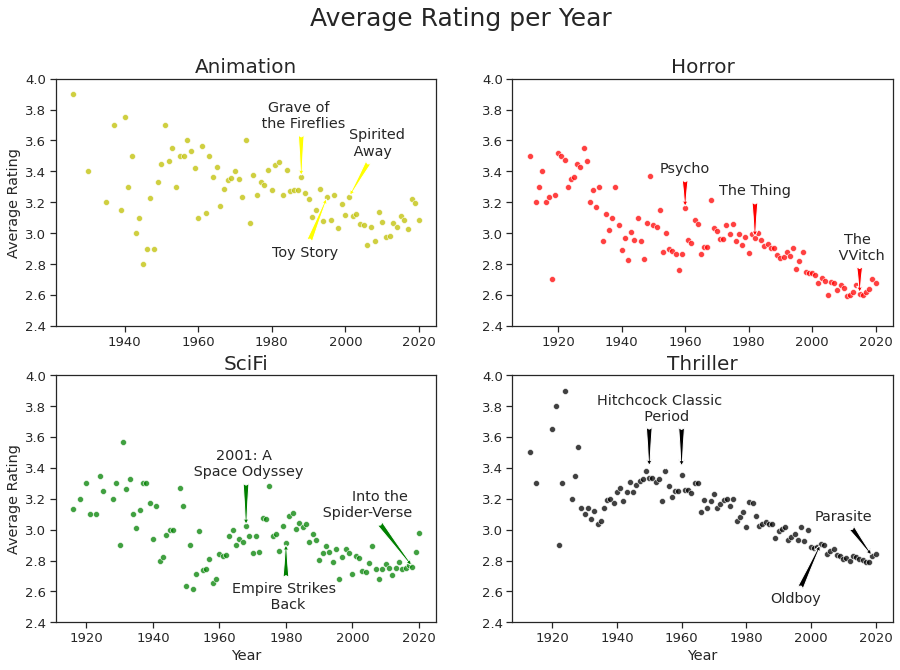

In [225]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Average Rating per Year', fontsize=25)

##Plots:

sns.scatterplot(data = animation_by_year.avg_rating, ax=axes[0,0], color='y',
               alpha=0.75)
axes[0,0].set_title('Animation', fontsize=20)
axes[0,0].set_ylabel('Average Rating')
axes[0,0].set_ylim((2.4,4))

sns.scatterplot(data = horror_by_year.avg_rating, ax=axes[0,1], color='r',
               alpha=0.75)
axes[0,1].set_title('Horror', fontsize=20)
axes[0,1].set_ylim((2.4,4))

sns.scatterplot(data = scifi_by_year.avg_rating, ax=axes[1,0], color='g',
               alpha=0.75)
axes[1,0].set_title('SciFi', fontsize=20)
axes[1,0].set_ylabel('Average Rating')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylim((2.4,4))

sns.scatterplot(data = thriller_by_year.avg_rating, ax=axes[1,1], color='k',
               alpha=0.75)
axes[1,1].set_title('Thriller', fontsize=20)
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylim((2.4,4))

# -----Annotations-----: Annotated movies are just to point out some classics or personal favorites 

# ------------Animation------------
axes[0,0].annotate('Spirited \n Away', 
                   xy=(2001, animation_by_year.loc[2001]['avg_rating']),
                   xytext=(2001, animation_by_year.loc[2001]['avg_rating'] + 0.25),
                   arrowprops=dict(arrowstyle='fancy', facecolor='yellow'),
                   horizontalalignment='left',
                   verticalalignment='bottom')

axes[0,0].annotate('Toy Story', 
                   xy=(1995, animation_by_year.loc[1995]['avg_rating']),
                   xytext=(1998, animation_by_year.loc[1995]['avg_rating'] - 0.4),
                   arrowprops=dict(arrowstyle='fancy', facecolor='yellow'),
                   horizontalalignment='right',
                   verticalalignment='bottom')

axes[0,0].annotate('Grave of \n the Fireflies', 
                   xy=(1988, animation_by_year.loc[1988]['avg_rating']),
                   xytext=(1988, animation_by_year.loc[1988]['avg_rating'] + 0.3),
                   arrowprops=dict(arrowstyle='fancy', facecolor='yellow'),
                   horizontalalignment='center',
                   verticalalignment='bottom')




# ---------- Horror ----------
axes[0,1].annotate('The Thing', 
                   xy=(1982, horror_by_year.loc[1982]['avg_rating']),
                   xytext=(1982, horror_by_year.loc[1982]['avg_rating'] + 0.35),
                   arrowprops=dict(arrowstyle='fancy', facecolor='red'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[0,1].annotate('Psycho', 
                   xy=(1960, horror_by_year.loc[1960]['avg_rating']),
                   xytext=(1960, horror_by_year.loc[1960]['avg_rating'] + 0.3),
                   arrowprops=dict(arrowstyle='fancy', facecolor='red'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[0,1].annotate('The \n VVitch', 
                   xy=(2015, horror_by_year.loc[2015]['avg_rating']),
                   xytext=(2015, horror_by_year.loc[2015]['avg_rating'] + 0.4),
                   arrowprops=dict(arrowstyle='fancy', facecolor='red'),
                   horizontalalignment='center',
                   verticalalignment='top')

# ---------- SciFi ----------

axes[1,0].annotate('Empire Strikes \n Back', 
                   xy=(1980, scifi_by_year.loc[1980]['avg_rating']),
                   xytext=(1980, scifi_by_year.loc[1980]['avg_rating'] - 0.25),
                   arrowprops=dict(arrowstyle='fancy', facecolor='green'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[1,0].annotate('2001: A \n Space Odyssey', 
                   xy=(1968, scifi_by_year.loc[1968]['avg_rating']),
                   xytext=(1968, scifi_by_year.loc[1968]['avg_rating'] + 0.5),
                   arrowprops=dict(arrowstyle='fancy', facecolor='green'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[1,0].annotate('Into the \n Spider-Verse', 
                   xy=(2018, scifi_by_year.loc[2018]['avg_rating']),
                   xytext=(2018, scifi_by_year.loc[2018]['avg_rating'] + 0.5),
                   arrowprops=dict(arrowstyle='fancy', facecolor='green'),
                   horizontalalignment='right',
                   verticalalignment='top')

# ---------Thriller-------------
axes[1,1].annotate('Parasite', 
                   xy=(2019, thriller_by_year.loc[2019]['avg_rating']),
                   xytext=(2019, thriller_by_year.loc[2019]['avg_rating'] + 0.3),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='right',
                   verticalalignment='top')

axes[1,1].annotate('Hitchcock Classic \n  Period', 
                   xy=(1955, thriller_by_year.loc[1955]['avg_rating'] ),
                   xytext=(1954, thriller_by_year.loc[1955]['avg_rating'] + 0.5),
                   arrowprops=dict(arrowstyle='-', facecolor='black'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[1,1].annotate('', 
                   xy=(1950, thriller_by_year.loc[1950]['avg_rating'] + 0.07),
                   xytext=(1950, thriller_by_year.loc[1950]['avg_rating'] + 0.34),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='left',
                   verticalalignment='top')

axes[1,1].annotate('', 
                   xy=(1960, thriller_by_year.loc[1960]['avg_rating'] + 0.05),
                   xytext=(1960, thriller_by_year.loc[1960]['avg_rating'] + 0.32),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='right',
                   verticalalignment='top')

axes[1,1].annotate('Oldboy', 
                   xy=(2003, thriller_by_year.loc[2003]['avg_rating'] ),
                   xytext=(2003, thriller_by_year.loc[2003]['avg_rating'] - 0.4),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='right',
                   verticalalignment='bottom')



plt.savefig('Figures/Avg_Rating_per_Year.png')
plt.show()

### Animation

Animation has a near constant trend in rating over time. Pretty consistent!

Mention Into the spiderverse! Didnt annotate to avoid clutter

Removed Over the Garden Wall by Nate Cash because it is an animated series

In [41]:
top_animation = animation.nlargest(15, 'avg_rating')
top_animation

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
8119,Spirited Away,2001,Hayao Miyazaki,125,437759,178080,4.5,257,512,291,1687,1760,10355,14469,56612,43915,121555
0,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471600,232066,4.4,275,585,329,1929,2184,13931,22173,84347,71034,151015
5,Princess Mononoke,1997,Hayao Miyazaki,134,214237,76679,4.3,84,187,145,900,1216,6549,10927,32934,25078,43308
8028,Neon Genesis Evangelion: The End of Evangelion,1997,"Hideaki Anno,Kazuya Tsurumaki",87,54217,19992,4.3,127,157,156,412,546,1843,2449,6910,5789,13323
8039,It's Such a Beautiful Day,2012,Don Hertzfeldt,62,35875,13329,4.3,56,114,78,306,339,1343,1940,5275,4326,8397
8091,Perfect Blue,1997,Satoshi Kon,81,91101,35405,4.3,47,114,92,434,681,3012,5844,17688,13882,17324
8095,Grave of the Fireflies,1988,Isao Takahata,89,126525,40588,4.3,112,183,168,704,966,3760,6235,18915,15316,27127
11,Your Name.,2016,Makoto Shinkai,106,175635,68673,4.2,257,387,425,1701,2305,8738,13399,31838,22584,37559
18,Howl's Moving Castle,2004,Hayao Miyazaki,119,207310,70875,4.2,69,200,232,1125,1828,8763,15046,34983,18480,32457
7292,Rilakkuma and Kaoru,2019,Masahito Kobayashi,151,1245,519,4.2,0,2,3,5,9,41,84,233,110,241


#### Miyazaki-San Analysis

In the top 15 feature length animation films, Miyazaki has 4 appearances.

His mean average rating over all his films is 4.06, while for the genre is 3.13, almost $2 \sigma$ above the mean.

In [42]:
miyazaki_films = animation[animation['director'] == 'Hayao Miyazaki'].sort_values('avg_rating', ascending=False)


In [43]:
miyazaki_films['avg_rating'].mean()

4.063636363636363

In [44]:
animation.avg_rating.mean()

3.1286541244573156

In [45]:
animation['avg_rating'].std()

0.47830628967991456

### Horror

In [46]:
horror.nlargest(15, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
7,The Thing,1982,John Carpenter,109,215480,78005,4.3,112,324,247,1339,1539,8292,12174,35860,24541,48856
11039,Psycho,1960,Alfred Hitchcock,109,323090,101065,4.3,85,229,167,1161,1335,10300,13792,50703,33030,63548
11041,Alien,1979,Ridley Scott,117,379504,130782,4.3,146,442,299,1973,1963,13696,17644,60265,38066,81281
11046,The Silence of the Lambs,1991,Jonathan Demme,119,482939,161110,4.3,148,365,259,1727,1904,14691,20634,80047,51372,92363
11049,The Shining,1980,Stanley Kubrick,144,535777,196151,4.3,463,1016,610,3798,3328,20073,22634,82486,52363,123437
4,Rosemary's Baby,1968,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435
8827,In Just the Wink of an Eye,1981,Mike de Leon,98,276,105,4.2,0,0,0,1,0,9,12,39,43,58
0,Get Out,2017,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264
14,What We Do in the Shadows,2014,"Taika Waititi,Jemaine Clement",86,210944,80476,4.1,177,378,294,1549,2260,11534,21547,49711,23046,28627
207,Demons,1971,Toshio Matsumoto,134,1860,593,4.1,0,2,1,15,30,62,153,380,288,262


In [47]:
horror[horror['title'] == 'The Witch']

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
1184,The Witch,1952,Roland af Hällström,74,151,37,3.3,0,1,4,4,9,30,23,33,1,1
4598,The Witch,1954,Chano Urueta,90,52,7,3.4,0,0,1,2,2,9,13,3,0,2
7627,The Witch,1966,Damiano Damiani,109,195,32,3.4,0,1,2,9,16,29,32,26,7,7
11042,The Witch,2015,Robert Eggers,92,265695,83771,3.8,1042,2425,1446,6307,5999,20950,27476,57322,26689,30475


In [48]:
horror[horror['title'] == 'The Thing']

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
7,The Thing,1982,John Carpenter,109,215480,78005,4.3,112,324,247,1339,1539,8292,12174,35860,24541,48856
76,The Thing,2011,Matthijs van Heijningen Jr.,103,40852,3854,2.7,447,1080,1508,4158,4275,6187,3105,1644,239,354


In [49]:
horror.avg_rating.mean()

2.7660963757845733

In [50]:
horror.avg_rating.std()

0.45408562051596413

#### The Thing

Highest rated Horror film on platform. 

$3.4 \sigma$ above genre mean!

### Sci-Fi

In [51]:
scifi.nlargest(15, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471056,231832,4.4,275,585,330,1923,2178,13916,22153,84260,70990,150869
9,The Empire Strikes Back,1980,Irvin Kershner,124,506762,180467,4.4,228,473,268,1861,2023,15036,16978,62922,44127,127552
5760,Stalker,1979,Andrey Tarkovsky,162,80202,28967,4.4,121,220,211,596,691,2314,3277,9860,9856,23385
1,Alien,1979,Ridley Scott,117,379337,130733,4.3,145,442,299,1974,1961,13690,17632,60239,38044,81236
12,2001: A Space Odyssey,1968,Stanley Kubrick,149,339349,117398,4.3,767,1662,863,3863,2860,12669,12115,38334,28574,94504
5652,Neon Genesis Evangelion: The End of Evangelion,1997,"Hideaki Anno,Kazuya Tsurumaki",87,54131,19965,4.3,127,157,156,412,543,1840,2445,6900,5774,13306
5787,The Thing,1982,John Carpenter,109,215385,77971,4.3,112,324,247,1337,1538,8285,12168,35842,24522,48840
5811,Star Wars,1977,George Lucas,121,548822,189813,4.3,317,723,411,2841,3223,22991,26838,87856,46209,101821
16,Terminator 2: Judgment Day,1991,James Cameron,156,268780,77191,4.2,137,353,254,1812,1946,11120,13982,40298,26341,42377
30,Solaris,1972,Andrey Tarkovsky,167,62498,18165,4.2,57,161,151,608,727,2349,3615,9830,8301,10518


#### Empire Strikes Back

$3.1 \sigma$ above genre avg

In [52]:
scifi[scifi['title'] == 'The Empire Strikes Back']

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
9,The Empire Strikes Back,1980,Irvin Kershner,124,506762,180467,4.4,228,473,268,1861,2023,15036,16978,62922,44127,127552


In [53]:
scifi.avg_rating.mean()

2.8439832368788704

In [54]:
scifi.avg_rating.std()

0.5138648700864449

### Thriller


In [55]:
thriller.nlargest(15, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Parasite,2019,Bong Joon-ho,133,539266,283450,4.6,308,427,289,1266,1640,8667,14524,69003,90025,243931
12474,Woman in the Dunes,1964,Hiroshi Teshigahara,123,17151,5783,4.4,20,25,16,77,96,431,770,2656,2745,3724
12590,High and Low,1963,Akira Kurosawa,142,26773,9744,4.4,3,15,8,53,93,506,1084,4071,4835,6769
12833,Pulp Fiction,1994,Quentin Tarantino,154,693834,286934,4.4,642,1592,738,4727,3552,24158,24063,97896,65407,181714
12835,The Dark Knight,2008,Christopher Nolan,152,712015,286444,4.4,418,961,539,3362,3224,20605,22880,96118,71165,187892
1,Psycho,1960,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548
8,No Country for Old Men,2007,"Joel Coen,Ethan Coen",122,368493,121964,4.3,281,773,429,2600,2365,13141,17989,62060,45263,72926
12215,Le Trou,1960,Jacques Becker,132,9685,3071,4.3,5,7,6,29,41,195,479,1805,1897,1717
12429,Army of Shadows,1969,Jean-Pierre Melville,145,16855,5099,4.3,7,21,12,94,151,597,1067,3038,2606,3247
12483,A Man Escaped,1956,Robert Bresson,101,21763,6531,4.3,11,16,23,100,157,671,1339,4072,3179,3765


In [56]:
hitchcock_films = thriller[thriller['director'] == 'Alfred Hitchcock'].sort_values('avg_rating', ascending=False)

In [57]:
thriller[(thriller.year >= 1950) & (thriller.year <= 1960)].nlargest(15, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
1,Psycho,1960,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548
12215,Le Trou,1960,Jacques Becker,132,9685,3071,4.3,5,7,6,29,41,195,479,1805,1897,1717
12483,A Man Escaped,1956,Robert Bresson,101,21763,6531,4.3,11,16,23,100,157,671,1339,4072,3179,3765
12793,Rear Window,1954,Alfred Hitchcock,112,209305,68430,4.3,37,149,106,674,978,5937,10078,33900,24874,42485
130,Sweet Smell of Success,1957,Alexander Mackendrick,97,21043,6359,4.2,9,11,27,115,192,857,1508,3851,3185,3437
12428,The Wages of Fear,1953,Henri-Georges Clouzot,153,18807,5430,4.2,14,26,29,92,164,614,1223,3365,3023,3087
12476,In a Lonely Place,1950,Nicholas Ray,94,23904,7211,4.2,10,22,25,114,217,1008,1967,4934,3393,3566
12697,The Night of the Hunter,1955,Charles Laughton,93,57206,18460,4.2,33,90,84,451,638,2377,3779,9171,7402,11402
12740,North by Northwest,1959,Alfred Hitchcock,136,109221,28877,4.2,37,92,109,529,791,4393,7713,19964,12284,14272
12804,Vertigo,1958,Alfred Hitchcock,128,207023,60166,4.2,138,322,303,1378,1780,8715,12325,32198,20712,38301


In [58]:
hitchcock_films[(hitchcock_films.year >= 1950) & (hitchcock_films.year <= 1960)]

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
1,Psycho,1960,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548
12793,Rear Window,1954,Alfred Hitchcock,112,209305,68430,4.3,37,149,106,674,978,5937,10078,33900,24874,42485
12740,North by Northwest,1959,Alfred Hitchcock,136,109221,28877,4.2,37,92,109,529,791,4393,7713,19964,12284,14272
12804,Vertigo,1958,Alfred Hitchcock,128,207023,60166,4.2,138,322,303,1378,1780,8715,12325,32198,20712,38301
60,Strangers on a Train,1951,Alfred Hitchcock,101,56887,13226,4.0,10,37,57,267,591,3040,5831,12350,5627,4497
12607,Dial M for Murder,1954,Alfred Hitchcock,105,56061,13233,4.0,19,38,48,259,497,2835,5485,12807,6103,4072
12368,The Man Who Knew Too Much,1956,Alfred Hitchcock,120,30820,5327,3.7,12,49,71,343,732,3185,4696,5509,1451,1039
117,To Catch a Thief,1955,Alfred Hitchcock,106,36872,7021,3.6,11,53,78,474,1036,4532,6012,6449,1538,1272
11455,Stage Fright,1950,Alfred Hitchcock,110,5502,758,3.4,3,13,25,110,269,935,979,653,108,113


In [59]:
thriller[(thriller.year >= 1950) & (thriller.year <= 1960)].avg_rating.mean()

3.2890710382513704

In [60]:
hitchcock_films[(hitchcock_films.year >= 1950) & (hitchcock_films.year <= 1960)].avg_rating.mean()

3.9666666666666663

In [61]:
thriller[(thriller.year >= 1910) & (thriller.year <= 1930)].shape

(30, 17)

In [62]:
(4.6 - thriller_rating_mean)/thriller_rating_std

3.71111111111111

In [63]:
(3.97 - thriller[(thriller.year >= 1950) & (thriller.year <= 1960)].avg_rating.mean())/thriller[(thriller.year >= 1950) & (thriller.year <= 1960)].avg_rating.std()

1.740341513802289

#### Parasite Analysis

Mean average rating for the thriller genre started to trend down in the 60's, with an apparent potential change in trend in the last couple of years. Parasite (2019) is the highest rated movie on the platform. $3.7 \sigma $ Above Genre mean!!

#### Hitchcock Analysis

In Hitchcock's classic period (1950 - 1960) he put out 9 films. The mean average rating of the 9 films is 4.0, whereas the mean average rating for the full population on the decade is 3.28.

5 of his movies appear in the top 15 movies of the decade: 1/3

$1.74 \sigma$ Over Decade Average

#### '10s to '30s

Few movies with big enough number of ratings to make the cut, only 33 movies in the dataset belong to this time period

## Views, Likes, total Ratings

In [64]:
# Obtaining total number of ratings for each movie and genre
animation['total_ratings'] = animation.half_star + animation.one_star + animation.one_half_star + animation.two_star + animation.two_half_star + animation.three_star + animation.three_half_star + animation.four_star + animation.four_half_star + animation.five_star
horror['total_ratings'] = horror.half_star + horror.one_star + horror.one_half_star + horror.two_star + horror.two_half_star + horror.three_star + horror.three_half_star + horror.four_star + horror.four_half_star + horror.five_star
scifi['total_ratings'] = scifi.half_star + scifi.one_star + scifi.one_half_star + scifi.two_star + scifi.two_half_star + scifi.three_star + scifi.three_half_star + scifi.four_star + scifi.four_half_star + scifi.five_star
thriller['total_ratings'] = thriller.half_star + thriller.one_star + thriller.one_half_star + thriller.two_star + thriller.two_half_star + thriller.three_star + thriller.three_half_star + thriller.four_star + thriller.four_half_star + thriller.five_star


In [65]:
# Like/views ratio to get a relative measure
animation['like_to_views_ratio'] = animation.likes/animation.views
horror['like_to_views_ratio'] = horror.likes/horror.views
scifi['like_to_views_ratio'] = scifi.likes/scifi.views
thriller['like_to_views_ratio'] = thriller.likes/thriller.views

In [66]:
print('Like/Views Statistics: \n',
      f'Anim: μ ={animation.like_to_views_ratio.mean()}, \sigma ={animation.like_to_views_ratio.std()} \n',
      f'Horror: μ = {horror.like_to_views_ratio.mean()}, \sigma = {horror.like_to_views_ratio.std()} \n',
      f'Scifi: μ = {scifi.like_to_views_ratio.mean()}, \sigma = {scifi.like_to_views_ratio.std()} \n',
      f'Thriller: μ = {thriller.like_to_views_ratio.mean()}, \sigma = {thriller.like_to_views_ratio.std()}')

Like/Views Statistics: 
 Anim: μ =0.1431274809307327, \sigma =0.07831628606538732 
 Horror: μ = 0.12015481425408901, \sigma = 0.06981751160317613 
 Scifi: μ = 0.12804450639150405, \sigma = 0.07179931330465651 
 Thriller: μ = 0.11570558915885386, \sigma = 0.06876669831100726


In [67]:
animation['total_ratings_to_views_ratio'] = animation.total_ratings/animation.views
horror['total_ratings_to_views_ratio'] = horror.total_ratings/horror.views
scifi['total_ratings_to_views_ratio'] = scifi.total_ratings/scifi.views
thriller['total_ratings_to_views_ratio'] = thriller.total_ratings/thriller.views

In [68]:
print('Total_Ratings/Views Statistics: \n',
      f'Anim: μ ={animation.total_ratings_to_views_ratio.mean()}, \sigma ={animation.total_ratings_to_views_ratio.std()} \n',
      f'Horror: μ = {horror.total_ratings_to_views_ratio.mean()}, \sigma = {horror.total_ratings_to_views_ratio.std()} \n',
      f'Scifi: μ = {scifi.total_ratings_to_views_ratio.mean()}, \sigma = {scifi.total_ratings_to_views_ratio.std()} \n',
      f'Thriller: μ = {thriller.total_ratings_to_views_ratio.mean()}, \sigma = {thriller.total_ratings_to_views_ratio.std()}')

Total_Ratings/Views Statistics: 
 Anim: μ =0.5258850007907389, \sigma =0.12426410193125147 
 Horror: μ = 0.6311477864486709, \sigma = 0.0954864670431939 
 Scifi: μ = 0.5872224103065542, \sigma = 0.10232368580064084 
 Thriller: μ = 0.6161214185285863, \sigma = 0.09972676504289836


In [69]:
#calculating Skewness
animation_skp = round(animation.like_to_views_ratio.skew(), 2)
horror_skp = round(horror.like_to_views_ratio.skew(), 2)
scifi_skp = round(scifi.like_to_views_ratio.skew(), 2)
thriller_skp = round(thriller.like_to_views_ratio.skew(), 2)

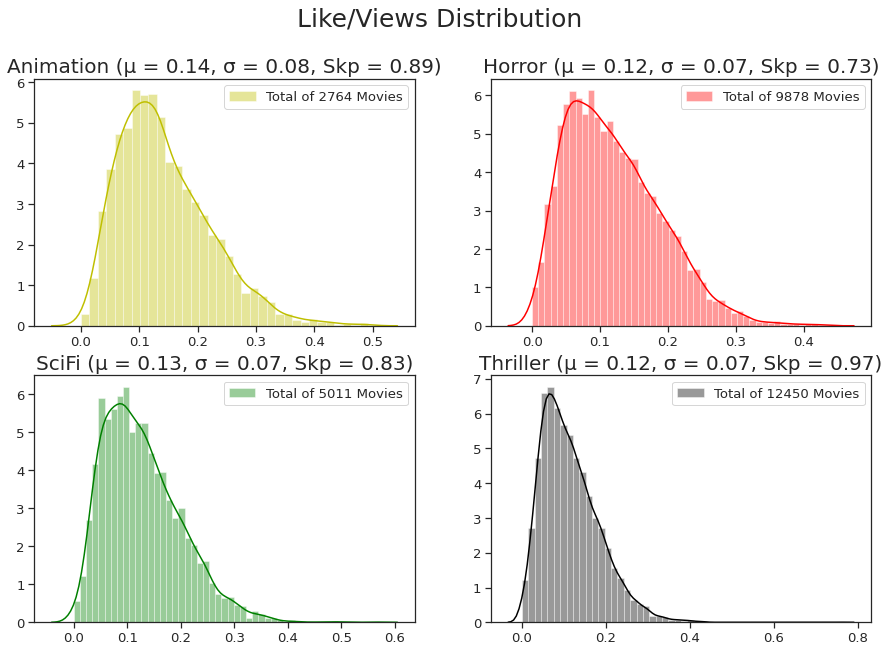

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Like/Views Distribution', fontsize=25)

sns.distplot(animation.like_to_views_ratio, ax=axes[0,0], norm_hist=True,
             color='y', axlabel=False, label=f'Total of {animation_n_movies} Movies')
axes[0,0].set_title(f'Animation (μ = {round(animation.like_to_views_ratio.mean(),2)}, σ = {round(animation.like_to_views_ratio.std(), 2)}, Skp = {animation_skp})',
                    fontsize=20)
axes[0,0].legend(loc='upper right')

sns.distplot(horror.like_to_views_ratio, ax=axes[0,1], norm_hist=True,
             color='r', axlabel=False, label=f'Total of {horror_n_movies} Movies')
axes[0,1].set_title(f'Horror (μ = {round(horror.like_to_views_ratio.mean(), 2)}, σ = {round(horror.like_to_views_ratio.std(), 2)}, Skp = {horror_skp})',
                    fontsize=20)
axes[0,1].legend(loc='upper right')

sns.distplot(scifi.like_to_views_ratio, ax=axes[1,0], norm_hist=True,
             color='g', axlabel=False, label=f'Total of {scifi_n_movies} Movies')
axes[1,0].set_title(f'SciFi (μ = {round(scifi.like_to_views_ratio.mean(), 2)}, σ = {round(scifi.like_to_views_ratio.std(), 2)}, Skp = {scifi_skp})',
                    fontsize=20)
axes[1,0].legend(loc='upper right')

sns.distplot(thriller.like_to_views_ratio, ax=axes[1,1], norm_hist=True,
             color='k', axlabel=False, label=f'Total of {thriller_n_movies} Movies')
axes[1,1].set_title(f'Thriller (μ = {round(thriller.like_to_views_ratio.mean(), 2)}, σ = {round(thriller.like_to_views_ratio.std(), 2)}, Skp = {thriller_skp})',
                    fontsize=20)
axes[1,1].legend(loc='upper right')

plt.savefig('Figures/Like_Views_Ratio.png')
plt.show()

In [71]:
animation_skp2 = round(animation.total_ratings_to_views_ratio.skew(), 2)
horror_skp2 = round(horror.total_ratings_to_views_ratio.skew(), 2)
scifi_skp2 = round(scifi.total_ratings_to_views_ratio.skew(), 2)
thriller_skp2 = round(thriller.total_ratings_to_views_ratio.skew(), 2)

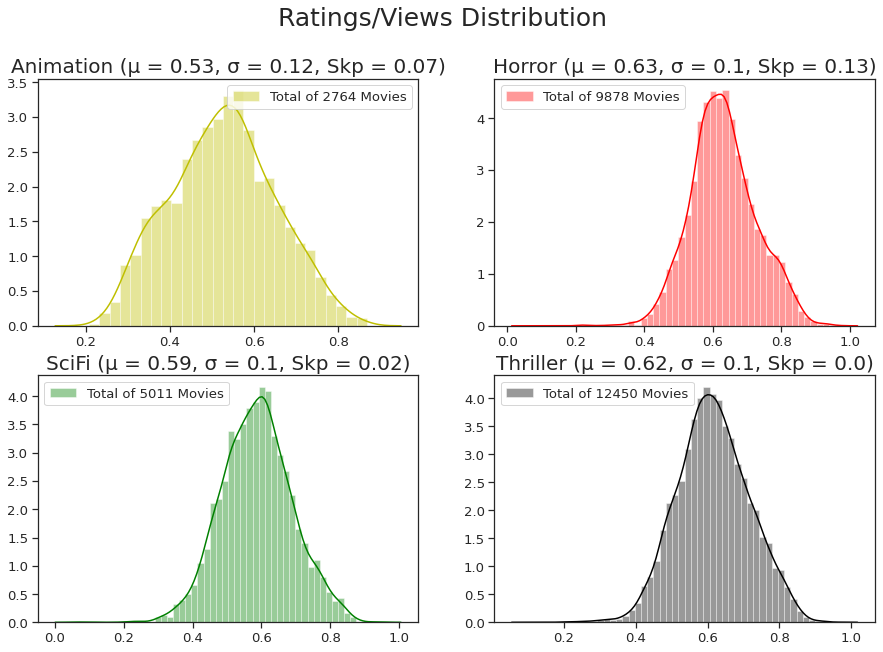

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Ratings/Views Distribution', fontsize=25)

sns.distplot(animation.total_ratings_to_views_ratio, ax=axes[0,0], norm_hist=True,
             color='y', axlabel=False, label=f'Total of {animation_n_movies} Movies')
axes[0,0].set_title(f'Animation (μ = {round(animation.total_ratings_to_views_ratio.mean(),2)}, σ = {round(animation.total_ratings_to_views_ratio.std(), 2)}, Skp = {animation_skp2})',
                    fontsize=20)
axes[0,0].legend(loc='upper right')

sns.distplot(horror.total_ratings_to_views_ratio, ax=axes[0,1], norm_hist=True,
             color='r', axlabel=False, label=f'Total of {horror_n_movies} Movies')
axes[0,1].set_title(f'Horror (μ = {round(horror.total_ratings_to_views_ratio.mean(), 2)}, σ = {round(horror.total_ratings_to_views_ratio.std(), 2)}, Skp = {horror_skp2})',
                    fontsize=20)
axes[0,1].legend(loc='upper left')

sns.distplot(scifi.total_ratings_to_views_ratio, ax=axes[1,0], norm_hist=True,
             color='g', axlabel=False, label=f'Total of {scifi_n_movies} Movies')
axes[1,0].set_title(f'SciFi (μ = {round(scifi.total_ratings_to_views_ratio.mean(), 2)}, σ = {round(scifi.total_ratings_to_views_ratio.std(), 2)}, Skp = {scifi_skp2})',
                    fontsize=20)
axes[1,0].legend(loc='upper left')

sns.distplot(thriller.total_ratings_to_views_ratio, ax=axes[1,1], norm_hist=True,
             color='k', axlabel=False, label=f'Total of {thriller_n_movies} Movies')
axes[1,1].set_title(f'Thriller (μ = {round(thriller.total_ratings_to_views_ratio.mean(), 2)}, σ = {round(thriller.total_ratings_to_views_ratio.std(), 2)}, Skp = {thriller_skp2})',
                    fontsize=20)
axes[1,1].legend(loc='upper left')

plt.savefig('Figures/total_ratings_Views_Ratio.png')
plt.show()

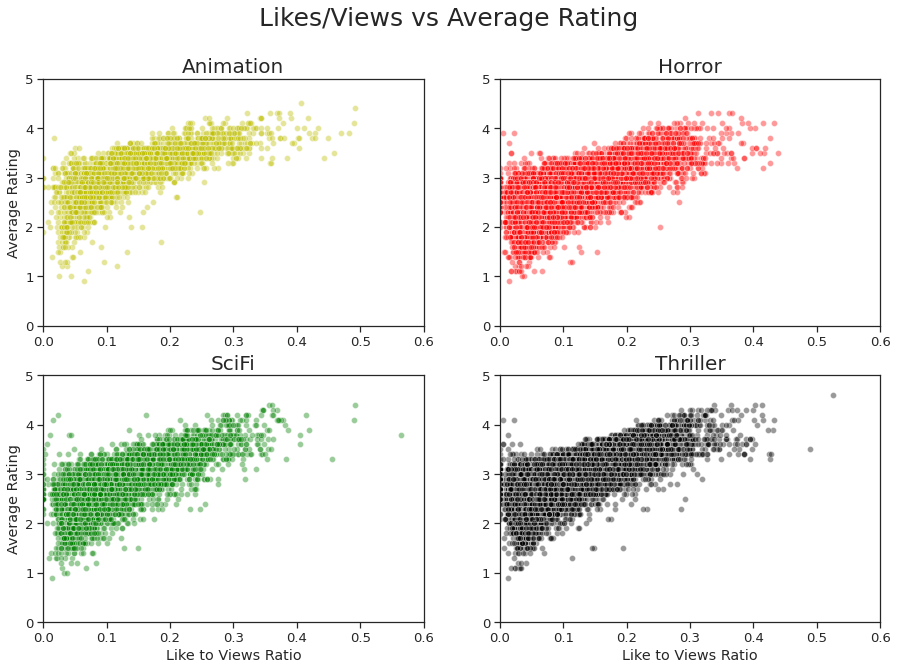

In [226]:
# Visualizing relationships between data.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Likes/Views vs Average Rating', fontsize=25)

sns.scatterplot(x='like_to_views_ratio', y='avg_rating', data = animation, ax=axes[0,0], color='y',
               alpha=0.4)
axes[0,0].set_title('Animation', fontsize=20)
axes[0,0].set_ylabel('Average Rating')
axes[0,0].set_xlabel('')
axes[0,0].set_ylim(0,5)
axes[0,0].set_xlim(0,0.6)


sns.scatterplot(x='like_to_views_ratio', y='avg_rating', data = horror, ax=axes[0,1], color='r',
               alpha=0.4)
axes[0,1].set_title('Horror', fontsize=20)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_ylim(0,5)
axes[0,1].set_xlim(0,0.6)


sns.scatterplot(x='like_to_views_ratio', y='avg_rating', data = scifi, ax=axes[1,0], color='g',
               alpha=0.4)
axes[1,0].set_title('SciFi', fontsize=20)
axes[1,0].set_ylabel('Average Rating')
axes[1,0].set_xlabel('Like to Views Ratio')
axes[1,0].set_ylim(0,5)
axes[1,0].set_xlim(0,0.6)


sns.scatterplot(x='like_to_views_ratio', y='avg_rating', data = thriller, ax=axes[1,1], color='k',
               alpha=0.4)
axes[1,1].set_title('Thriller', fontsize=20)
axes[1,1].set_xlabel('Like to Views Ratio')
axes[1,1].set_ylabel('')
axes[1,1].set_ylim(0,5)
axes[1,1].set_xlim(0,0.6)

plt.savefig('Figures/Corr_AvgRating_LikeViewRatio.png')

## Highest Rated Directors per Genre
Criteria for making the final list is, of course, a high rating and also having directed a number of movies that is larger than the 3rd quartile value for number of movies for each director
### Animation

In [74]:
anim_grouped = animation.groupby('director')
n_movies = anim_grouped.size()


In [75]:
anim_directors = anim_grouped.mean()

In [76]:
anim_directors['n_movies'] = n_movies



In [77]:
anim_directors.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,total_ratings,like_to_views_ratio,total_ratings_to_views_ratio,n_movies
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,2003.519766,85.057226,15183.544213,2684.592412,3.091002,78.540621,161.624834,147.110385,470.696386,512.013694,1383.982473,1129.289454,1611.208809,550.377019,909.152123,6953.995798,0.139831,0.529891,1.528761
std,14.649713,19.245674,54837.195937,12997.024582,0.482173,330.024252,558.599541,472.990632,1441.540746,1505.905395,4472.285462,4062.867038,7484.660224,3269.374119,6097.335594,26026.338161,0.076846,0.124920,1.489774
min,1926.000000,50.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.208333,1.000000
25%,1997.000000,74.500000,150.000000,18.000000,2.800000,1.000000,2.000000,3.000000,8.000000,8.958333,16.375000,10.000000,9.000000,2.000000,3.500000,80.000000,0.083266,0.438548,1.000000
50%,2007.500000,84.000000,528.500000,68.833333,3.200000,5.000000,10.000000,9.000000,23.000000,27.000000,55.533333,39.000000,34.000000,8.000000,15.000000,279.500000,0.127250,0.532184,1.000000
75%,2014.000000,93.000000,3159.437500,440.500000,3.400000,26.000000,48.125000,53.000000,135.000000,172.000000,352.750000,254.125000,237.250000,54.100000,88.250000,1679.375000,0.183437,0.618587,1.000000
max,2020.000000,227.000000,549906.000000,232066.000000,4.400000,6375.500000,7876.000000,6484.000000,16922.000000,13329.000000,40274.000000,39676.000000,85623.000000,71034.000000,151015.000000,347802.000000,0.492082,0.867470,25.000000


In [78]:
anim_top15_dirs = anim_directors[anim_directors.n_movies > anim_directors.n_movies.quantile(0.75)].nlargest(15, ['avg_rating', 'n_movies', 'like_to_views_ratio'])

In [79]:
anim_top15_dirs = anim_top15_dirs[['avg_rating', 'n_movies', 'running_time', 'views', 'likes', 'like_to_views_ratio', 'total_ratings_to_views_ratio' ]].round(2)
anim_top15_dirs 

,avg_rating,n_movies,running_time,views,likes,like_to_views_ratio,total_ratings_to_views_ratio
director,,,,,,,
Satoshi Kon,4.10,4,87.50,55095.00,18721.25,0.33,0.60
Andrew Stanton,4.10,2,99.00,534336.00,137109.50,0.26,0.45
John Lasseter,4.10,2,86.50,499319.00,116234.50,0.23,0.43
Hayao Miyazaki,4.06,11,111.27,158321.73,53697.18,0.31,0.57
Jarrad Wright,4.00,2,60.50,154.00,54.50,0.36,0.73
Wes Anderson,4.00,2,94.00,256293.50,85534.00,0.33,0.63
Brad Bird,3.97,3,106.33,373112.00,97922.67,0.27,0.51
"Hideaki Anno,Kazuya Tsurumaki",3.95,2,141.00,27346.50,10041.00,0.28,0.52
Pete Docter,3.95,2,93.50,530608.00,140520.50,0.26,0.48


### Horror

In [80]:
horror_grouped = horror.groupby('director')
horror_n_movies = horror_grouped.size()

In [81]:
horror_directors = horror_grouped.mean()

In [82]:
horror_directors['n_movies'] = horror_n_movies

In [83]:
horror_directors.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,total_ratings,like_to_views_ratio,total_ratings_to_views_ratio,n_movies
count,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.00000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000
mean,1999.272331,90.698949,3982.173484,761.792892,2.761885,52.377455,98.625957,91.785454,224.556792,226.325960,465.78536,385.265286,470.686929,160.719735,199.706406,2375.835335,0.116056,0.636350,1.604092
std,19.241722,14.046901,21060.639105,6016.156707,0.422443,207.867482,380.791377,336.346603,853.286004,844.869992,2081.12432,2093.832210,3665.236927,1661.736336,2623.524440,12830.724306,0.067212,0.095122,1.838659
min,1911.000000,50.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.058524,1.000000
25%,1987.500000,84.000000,104.000000,9.000000,2.500000,3.000000,6.000000,6.000000,10.500000,9.000000,10.50000,4.500000,3.000000,0.000000,1.000000,67.000000,0.063843,0.573117,1.000000
50%,2007.000000,90.000000,271.666667,29.500000,2.800000,8.000000,14.000000,14.000000,27.000000,25.000000,33.00000,16.550000,10.000000,2.000000,3.000000,175.000000,0.105431,0.629213,1.000000
75%,2014.000000,96.000000,1057.750000,138.000000,3.000000,24.000000,42.000000,43.000000,94.000000,95.000000,147.75000,85.000000,57.000000,11.000000,13.000000,671.000000,0.157635,0.698919,2.000000
max,2020.000000,239.000000,535777.000000,196151.000000,4.300000,3858.000000,7938.000000,6442.000000,16200.000000,17143.000000,44464.00000,50722.000000,107399.000000,52363.000000,123437.000000,326601.000000,0.438356,0.954128,47.000000


In [84]:
horror_top15_dirs = horror_directors[horror_directors.n_movies > horror_directors.n_movies.quantile(0.75)].nlargest(15, ['avg_rating', 'n_movies', 'like_to_views_ratio'])

In [85]:
horror_top15_dirs = horror_top15_dirs[['avg_rating', 'n_movies', 'running_time', 'views', 'likes', 'like_to_views_ratio', 'total_ratings_to_views_ratio' ]].round(2)
horror_top15_dirs 

,avg_rating,n_movies,running_time,views,likes,like_to_views_ratio,total_ratings_to_views_ratio
director,,,,,,,
Alfred Hitchcock,3.90,3,114.67,162002.33,44266.33,0.23,0.53
James Whale,3.80,4,72.25,31188.50,7634.50,0.25,0.59
Andrzej Żuławski,3.78,4,115.00,12322.25,4091.25,0.25,0.59
Juraj Herz,3.70,4,95.25,2257.50,631.75,0.25,0.61
Kim Jee-woon,3.67,3,118.00,31039.33,7844.33,0.23,0.63
Hiroyuki Tanaka,3.67,3,50.00,713.00,138.33,0.19,0.44
F.W. Murnau,3.67,3,97.00,30992.67,6823.00,0.19,0.56
Roman Polanski,3.66,5,121.60,53652.80,13312.20,0.21,0.56
Raúl Ruiz,3.60,3,102.00,891.00,259.33,0.21,0.56


### Sci-Fi

In [86]:
scifi_grouped = scifi.groupby('director')
scifi_n_movies = scifi_grouped.size()

In [87]:
scifi_directors = scifi_grouped.mean()

In [88]:
scifi_directors['n_movies'] = scifi_n_movies


In [89]:
scifi_directors.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,total_ratings,like_to_views_ratio,total_ratings_to_views_ratio,n_movies
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,1996.871354,94.492865,10490.555044,2005.896286,2.838993,105.523958,221.675972,203.902987,549.193083,540.416317,1166.176640,903.550149,1149.016310,396.992402,576.860740,5813.308558,0.124057,0.593757,1.460933
std,19.679625,19.880049,43335.687205,11614.394747,0.475557,583.492943,1036.711378,812.293439,2093.702018,1932.340696,4614.061294,3900.616237,6380.651587,2861.192898,5057.126156,24934.977517,0.068528,0.102987,1.334455
min,1916.000000,50.000000,37.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.058524,1.000000
25%,1986.000000,85.000000,124.000000,12.000000,2.500000,2.000000,5.000000,5.000000,10.000000,9.000000,13.000000,6.000000,4.000000,1.000000,1.000000,73.000000,0.072335,0.524601,1.000000
50%,2003.000000,91.500000,363.000000,44.000000,2.900000,8.000000,15.000000,15.500000,32.000000,27.750000,43.000000,23.000000,16.000000,3.000000,5.000000,225.500000,0.113191,0.592380,1.000000
75%,2013.000000,101.000000,2059.500000,255.250000,3.200000,30.729167,64.000000,63.916667,145.500000,151.000000,268.750000,162.833333,118.000000,24.000000,33.000000,1185.750000,0.164498,0.660676,1.000000
max,2020.000000,240.000000,650979.500000,237693.000000,4.400000,26627.000000,41716.000000,25062.000000,49076.000000,26754.000000,67523.000000,58170.000000,107842.500000,70990.000000,150869.000000,379739.500000,0.563636,0.947826,24.000000


In [90]:
scifi_top15_dirs = scifi_directors[scifi_directors.n_movies > scifi_directors.n_movies.quantile(0.75)].nlargest(15, ['avg_rating', 'n_movies', 'like_to_views_ratio'])

In [91]:
scifi_top15_dirs = scifi_top15_dirs[['avg_rating', 'n_movies', 'running_time', 'views', 'likes', 'like_to_views_ratio', 'total_ratings_to_views_ratio' ]].round(2)
scifi_top15_dirs 

,avg_rating,n_movies,running_time,views,likes,like_to_views_ratio,total_ratings_to_views_ratio
director,,,,,,,
Andrey Tarkovsky,4.30,2,164.50,71350.00,23566.00,0.33,0.61
Stanley Kubrick,4.25,2,143.00,344594.50,112199.50,0.33,0.56
Christopher Nolan,4.15,2,158.50,650979.50,237693.00,0.37,0.59
Denis Villeneuve,4.10,2,139.50,439005.50,163868.00,0.37,0.67
"Hideaki Anno,Kazuya Tsurumaki",3.95,2,141.00,27303.00,10027.50,0.28,0.52
Alfonso Cuarón,3.90,2,100.00,322039.00,81384.50,0.27,0.57
James Whale,3.85,2,71.00,40230.00,9493.00,0.24,0.56
George Miller,3.83,3,102.67,255006.33,91602.00,0.28,0.57
James Cameron,3.82,5,140.40,261365.00,57655.00,0.23,0.51


### Thriller

In [92]:
thriller_grouped = thriller.groupby('director')
thriller_n_movies = thriller_grouped.size()

In [93]:
thriller_directors = thriller_grouped.mean()

In [94]:
thriller_directors['n_movies'] = thriller_n_movies

In [95]:
thriller_directors.describe()

,year,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,total_ratings,like_to_views_ratio,total_ratings_to_views_ratio,n_movies
count,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000
mean,2001.500529,98.876350,4874.001797,901.947882,2.903763,46.293748,95.367976,92.972750,246.847356,261.493330,564.138861,491.164940,609.210290,218.492011,246.691702,2872.672963,0.111067,0.627036,1.679029
std,18.819958,17.620504,22351.380048,6124.265198,0.403700,226.018727,395.260069,344.006630,907.996723,921.709878,2263.944495,2268.792783,3944.290362,1857.521138,2551.839835,13764.675145,0.065072,0.098510,1.681397
min,1913.000000,50.000000,33.000000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.102151,1.000000
25%,1994.333333,89.000000,104.000000,9.000000,2.681667,1.000000,4.000000,4.000000,10.000000,9.500000,13.000000,6.000000,3.000000,0.354167,1.000000,65.000000,0.063140,0.562500,1.000000
50%,2009.000000,95.000000,290.000000,30.000000,2.900000,5.000000,10.000000,10.333333,24.500000,26.000000,40.666667,23.000000,15.000000,3.000000,3.000000,180.000000,0.100329,0.623371,1.000000
75%,2015.000000,105.500000,1268.666667,155.000000,3.200000,18.000000,34.000000,36.000000,92.291667,100.238095,186.785714,128.000000,91.000000,17.000000,18.000000,796.750000,0.147273,0.693694,2.000000
max,2020.000000,232.000000,529652.000000,189045.000000,4.400000,9777.000000,11929.000000,7487.000000,27060.000000,25535.000000,58742.000000,53357.000000,107541.000000,55446.000000,87311.333333,403689.000000,0.757576,0.969697,37.000000


In [96]:
thriller_top15_dirs = thriller_directors[thriller_directors.n_movies > thriller_directors.n_movies.quantile(0.75)].nlargest(15, ['avg_rating', 'n_movies', 'like_to_views_ratio'])

In [97]:
thriller_top15_dirs = thriller_top15_dirs[['avg_rating', 'n_movies', 'running_time', 'views', 'likes', 'like_to_views_ratio', 'total_ratings_to_views_ratio' ]].round(2)
thriller_top15_dirs 

,avg_rating,n_movies,running_time,views,likes,like_to_views_ratio,total_ratings_to_views_ratio
director,,,,,,,
Bong Joon-ho,4.30,3,131.00,221043.00,108370.33,0.39,0.73
Quentin Tarantino,3.99,7,138.71,398019.14,136767.43,0.31,0.60
Akira Kurosawa,3.94,5,116.60,19496.20,6029.60,0.27,0.63
Henri-Georges Clouzot,3.92,4,111.50,13830.25,3725.25,0.24,0.62
David Lynch,3.92,5,141.00,107665.00,31679.00,0.27,0.58
Denis Villeneuve,3.90,3,122.00,213827.00,61517.33,0.28,0.65
Jean-Pierre Melville,3.89,7,118.57,13699.43,3968.00,0.25,0.65
Christopher Nolan,3.88,6,124.33,338241.33,105767.17,0.26,0.56
Rainer Werner Fassbinder,3.87,3,141.67,4506.67,1187.33,0.25,0.63


# Cluster Analysis

Goal is to Determine groups of movies with distinct characteristics given  a few features: Average Rating, Running Time, Like/Views, Total-Ratings/ Views

Ideally keep 95% variance, but can be traded off with benefit of reducing an extra dimension.
## PCA For Dimenstionality Reduction

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Animation PCA

In [99]:
#Setting a Pipeline for Standardizing and PCA

anim_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('pca', PCA(n_components=0.94, random_state=69))], verbose=True)

In [100]:
anim_features = animation[['avg_rating', 'running_time', 'like_to_views_ratio', 'total_ratings_to_views_ratio']]


In [101]:
anim_pipeline.fit(anim_features)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   1.2s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.94,
                     random_state=69, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=True)

In [102]:
anim_pipeline['pca'].explained_variance_ratio_ # 3 PCs were kept, enough to make cluster visualization possible preserving 94% of variance

array([0.490655  , 0.24299788, 0.21543449])

In [103]:
anim_coefs = pd.DataFrame(anim_pipeline['pca'].components_, columns=anim_features.columns, index=['PC1', 'PC2', 'PC3'])
anim_coefs

,avg_rating,running_time,like_to_views_ratio,total_ratings_to_views_ratio
PC1,0.584119,0.279931,0.658281,0.383549
PC2,-0.456838,0.687134,-0.195623,0.529979
PC3,0.233381,0.670368,-0.084736,-0.699257


PC1 is primarily composed by avg_rating and like/views (sort of expected)

PC2 is more evenly spread with like/Views playing a smaller part this time

PC3 is Heavily dominated by running time and ratings/views

In [104]:
anim_features_3d = anim_pipeline.transform(anim_features) #Transformed features ready for clustering in PC space.

In [105]:
anim_reduced = pd.DataFrame(anim_features_3d, columns=anim_coefs.index, index=anim_features.index)

In [106]:
anim_reduced

,PC1,PC2,PC3
0,5.551399,-0.173259,0.037565
1,0.627905,-0.085587,0.604304
2,1.102763,-0.318244,0.926592
3,1.552283,-0.799622,1.163586
4,1.086719,-0.644339,1.196931
...,...,...,...
8118,2.140225,0.668073,0.683013
8119,4.559057,-0.491038,1.351425
8120,2.361729,-0.756415,0.421116
8121,3.819937,-0.514897,0.270416


### Horror PCA

In [107]:
horror_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('pca', PCA(n_components=0.93, random_state=69))], verbose=True)

In [108]:
horror_features = horror[['avg_rating', 'running_time', 'like_to_views_ratio', 'total_ratings_to_views_ratio']]

In [109]:
horror_pipeline.fit(horror_features)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.1s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.93,
                     random_state=69, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=True)

In [110]:
horror_pipeline['pca'].explained_variance_ratio_ # 3 PCs were kept, enough to make cluster visualization possible preserving 93% of variance

array([0.43009477, 0.27750585, 0.22546961])

In [111]:
horror_coefs = pd.DataFrame(horror_pipeline['pca'].components_, columns=horror_features.columns, index=['PC1', 'PC2', 'PC3'])
horror_coefs

,avg_rating,running_time,like_to_views_ratio,total_ratings_to_views_ratio
PC1,0.698342,0.162227,0.694600,0.059428
PC2,0.100251,0.623650,-0.181971,-0.753590
PC3,-0.155736,0.760161,-0.074554,0.626373


PC1: is primarily composed by avg_rating and like/views (sort of expected, again)

PC2: is more evenly spread with like/Views and avg_rating playing a smaller part this time

PC3: Heavily dominated by running time and ratings/views

In [112]:
horror_features_3d = horror_pipeline.transform(horror_features) #Transformed features ready for clustering in PC space.

In [113]:
horror_reduced = pd.DataFrame(horror_features_3d, columns=horror_coefs.index, index=horror_features.index)

In [114]:
horror_reduced

,PC1,PC2,PC3
0,5.335896,-0.257858,0.190462
1,2.247709,0.710913,-1.291127
2,4.072782,1.448224,3.497359
3,3.434207,0.374593,-0.973080
4,4.396847,2.362142,1.380558
...,...,...,...
11047,3.712308,-0.062510,1.542456
11048,4.724670,0.432459,1.918753
11049,5.376177,2.425394,1.692168
11050,4.625086,0.943230,3.408248


### Sci-Fi PCA

In [115]:
scifi_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('pca', PCA(n_components=0.93, random_state=69))], verbose=True)

scifi_features = scifi[['avg_rating', 'running_time', 'like_to_views_ratio', 'total_ratings_to_views_ratio']]

In [116]:
scifi_pipeline.fit(scifi_features)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.93,
                     random_state=69, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=True)

In [117]:
scifi_pipeline['pca'].explained_variance_ratio_ # 3 PCs were kept, enough to make cluster visualization possible preserving 93% of variance

array([0.44330263, 0.27758038, 0.21714656])

In [118]:
scifi_coefs = pd.DataFrame(scifi_pipeline['pca'].components_, columns=scifi_features.columns, index=['PC1', 'PC2', 'PC3'])
scifi_coefs

,avg_rating,running_time,like_to_views_ratio,total_ratings_to_views_ratio
PC1,0.692704,0.243512,0.678672,-0.016360
PC2,0.005123,0.571512,-0.229284,-0.787894
PC3,-0.180325,0.782410,-0.082450,0.590355


PC1 is primarily composed by avg_rating and like/views (sort of expected, again + 2)

PC2 is more evenly spread with avg_rating playing a particularly small part this time

PC3 Heavily dominated by running time and ratings/views

In [119]:
scifi_features_3d = scifi_pipeline.transform(scifi_features) #Transformed features ready for clustering in PC space.
scifi_reduced = pd.DataFrame(scifi_features_3d, columns=scifi_coefs.index, index=scifi_features.index)

In [120]:
scifi_reduced

,PC1,PC2,PC3
0,5.776852,-1.693009,0.742748
1,4.274548,0.079607,-0.028665
2,1.764879,-0.311187,1.462110
3,3.114686,1.089483,0.772266
4,2.913478,0.667823,1.191225
...,...,...,...
5822,4.552856,0.852221,3.264730
5823,4.674257,0.925199,1.133296
5824,3.350330,0.079292,1.291887
5825,4.209980,0.298126,1.786649


### Thriller PCA

In [121]:
thriller_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('pca', PCA(n_components=0.93, random_state=69))], verbose=True)

thriller_features = thriller[['avg_rating', 'running_time', 'like_to_views_ratio', 'total_ratings_to_views_ratio']]

In [122]:
thriller_pipeline.fit(thriller_features)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.93,
                     random_state=69, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=True)

In [123]:
thriller_pipeline['pca'].explained_variance_ratio_ # 3 PCs were kept, enough to make cluster visualization possible preserving 93% of variance

array([0.45180715, 0.29412394, 0.19057505])

In [124]:
thriller_coefs = pd.DataFrame(thriller_pipeline['pca'].components_, columns=thriller_features.columns, index=['PC1', 'PC2', 'PC3'])
thriller_coefs

,avg_rating,running_time,like_to_views_ratio,total_ratings_to_views_ratio
PC1,0.669062,0.280534,0.674125,0.138608
PC2,0.084669,0.613755,-0.182472,-0.763439
PC3,-0.294567,0.737225,-0.136281,0.592585


PC1 is primarily composed by avg_rating and like/views (sort of expected, again + 3)

PC2 is highly composed by running time and ratings/views

PC3 is more evenly spread out, but running time again is predominant

Thriller genre has been pretty particular in PCA

In [125]:
thriller_features_3d = thriller_pipeline.transform(thriller_features) #Transformed features ready for clustering in PC space.
thriller_reduced = pd.DataFrame(thriller_features_3d, columns=thriller_coefs.index, index=thriller_features.index)

In [126]:
thriller_reduced

,PC1,PC2,PC3
0,7.256153,-1.089609,0.453294
1,4.007393,0.614750,-1.394495
2,4.003343,1.871027,0.995235
3,3.131066,-0.342389,-0.856696
4,3.708962,-0.022767,-1.481145
...,...,...,...
12831,4.991042,-0.916667,-0.907437
12832,4.874538,0.457302,2.176331
12833,5.871441,1.493209,0.349747
12834,4.194466,-0.879206,0.675714


## Animation Clustering

### Finding Optimal Number of Clusters: Inertia and Silhouette Score

In [127]:
from sklearn.metrics import silhouette_score

In [155]:
anim_kmeans_per_k = [KMeans(n_clusters=k, random_state=69).fit(anim_reduced) for k in range(1,11)]

anim_inertias = [model.inertia_ for model in anim_kmeans_per_k]

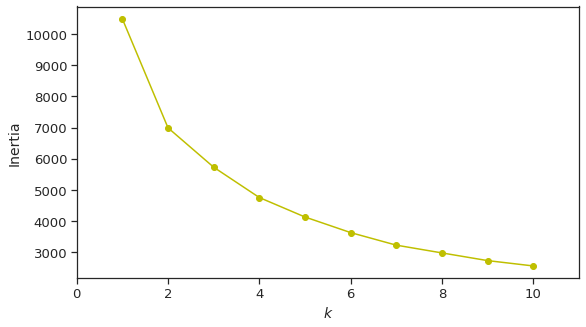

In [156]:
plt.figure(figsize=(9,5))
plt.plot(range(1, 11), anim_inertias, "yo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(2, anim_inertias[1]),
#              xytext=(0.4, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.xlim([0, 11])
plt.savefig("Figures/inertia_vs_k_plot_anim.png")
plt.show()

In [214]:
anim_silhouette_scores = [silhouette_score(anim_reduced, model.labels_) for model in anim_kmeans_per_k[1:]]
anim_silhouette_scores

[0.3024757969732099,
 0.2626948690434158,
 0.2677586008671717,
 0.2552780395501981,
 0.2584672501710622,
 0.2617709990942285,
 0.25509625770694144,
 0.2541818211470012,
 0.24762841812742517]

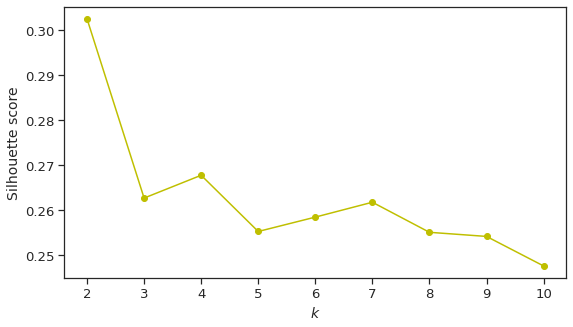

In [159]:
plt.figure(figsize=(9, 5))
plt.plot(range(2, 11), anim_silhouette_scores, "yo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.savefig("Figures/silhouette_score_vs_k_plot_anim.png")
plt.show()

In [132]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

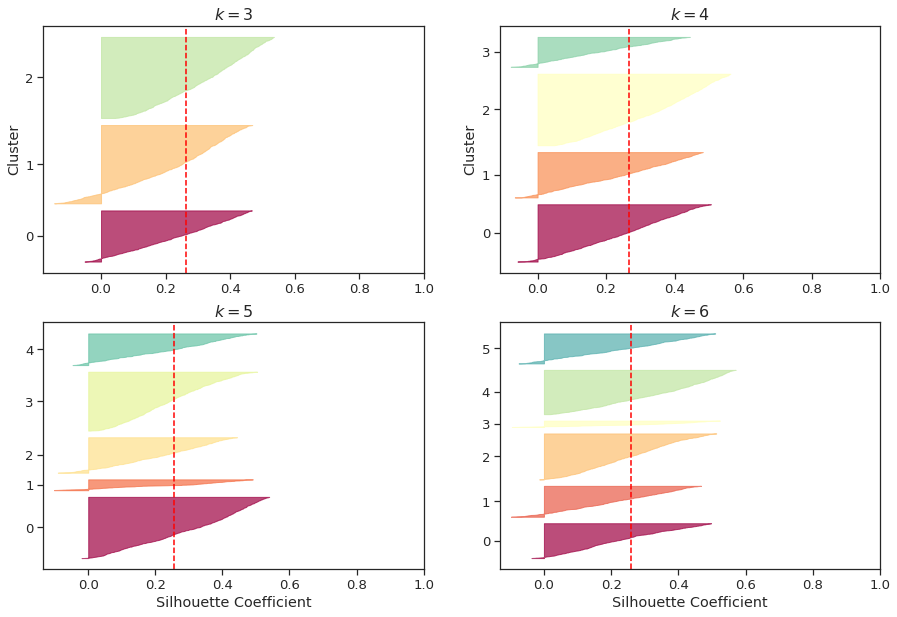

In [211]:
plt.figure(figsize=(15, 10))
n = 0
for k in (3, 4, 5, 6):
    n +=1
    plt.subplot(2, 2, n)
    
    y_pred = anim_kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(anim_reduced, y_pred)

    padding = len(anim_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 4):
        plt.ylabel("Cluster")
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
    if k in (5, 6):
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=anim_silhouette_scores[k-2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.savefig("Figures/silhouette_analysis_plot_anim.png")
plt.show()

### Visualizing Clusters
###### We are choosing  k = 4

The silhouette diagram above indicates that, for the animation genre, k = 4 provides the highest silhouette score and at the smae time all clusters have their silhouette coefficiente over the average score. While this is true for the rest, they all have lower silhouette scores.

In [192]:
anim_clusters = anim_kmeans_per_k[3]

In [193]:
animation['cluster'] = anim_clusters.labels_

In [136]:
from mpl_toolkits.mplot3d import Axes3D

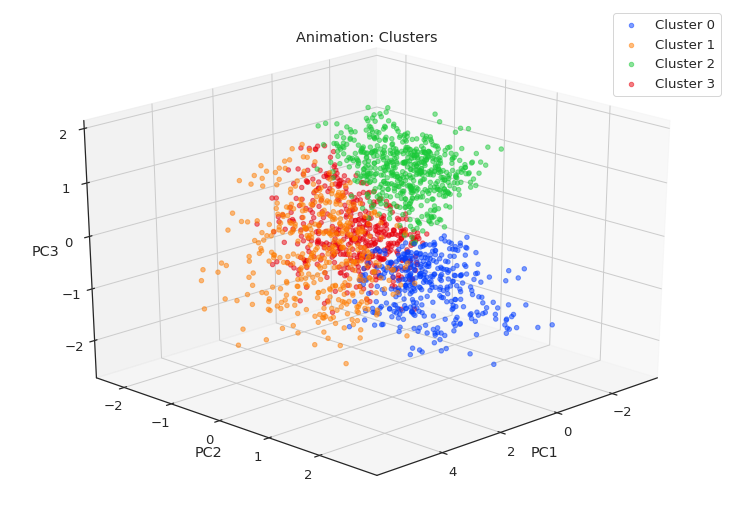

In [216]:

fig = plt.figure(figsize=(10,7))

ax = Axes3D(fig)
# Plotting Cluster 0
x_0 = anim_reduced[animation.cluster == 0].PC1
y_0 = anim_reduced[animation.cluster == 0].PC2
z_0 = anim_reduced[animation.cluster == 0].PC3
ax.scatter(x_0, y_0, z_0, label='Cluster 0', marker='o', alpha=0.5)

# Plotting Cluster 1
x_1 = anim_reduced[animation.cluster == 1].PC1
y_1 = anim_reduced[animation.cluster == 1].PC2
z_1 = anim_reduced[animation.cluster == 1].PC3
ax.scatter(x_1, y_1, z_1, label='Cluster 1', marker='o', alpha=0.5)

# Plotting Cluster 2
x_2 = anim_reduced[animation.cluster == 2].PC1
y_2 = anim_reduced[animation.cluster == 2].PC2
z_2 = anim_reduced[animation.cluster == 2].PC3
ax.scatter(x_2, y_2, z_2, label='Cluster 2', marker='o', alpha=0.5)

# Plotting Cluster 3
x_3 = anim_reduced[animation.cluster == 3].PC1
y_3 = anim_reduced[animation.cluster == 3].PC2
z_3 = anim_reduced[animation.cluster == 3].PC3
ax.scatter(x_3, y_3, z_3, label='Cluster 3', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Animation: Clusters')

ax.view_init(25, 45)

plt.legend()

plt.show()


## Horror Clustering

### Finding Optimal Number of Clusters

In [162]:
horror_kmeans_per_k = [KMeans(n_clusters=k, random_state=69).fit(horror_reduced) for k in range(1,11)]

horror_inertias = [model.inertia_ for model in horror_kmeans_per_k]

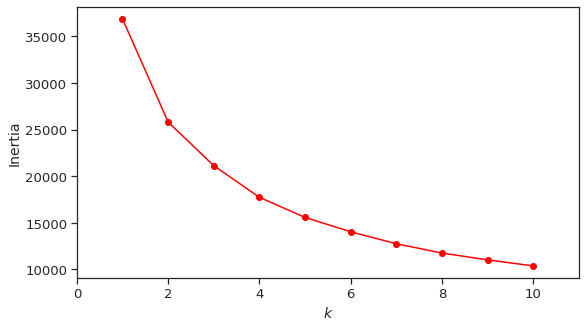

In [164]:
plt.figure(figsize=(9,5))
plt.plot(range(1, 11), horror_inertias, "ro-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(2, horror_inertias[1]),
#              xytext=(0.4, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.xlim([0, 11])
plt.savefig("Figures/inertia_vs_k_plot_horror.png")
plt.show()

In [165]:
horror_silhouette_scores = [silhouette_score(horror_reduced, model.labels_) for model in horror_kmeans_per_k[1:]]
horror_silhouette_scores

[0.2911462866329065,
 0.2517998445780022,
 0.26438871348950727,
 0.24490503898645669,
 0.2359459582071283,
 0.23539284201372215,
 0.23558414056309393,
 0.223539671332111,
 0.2260714052186862]

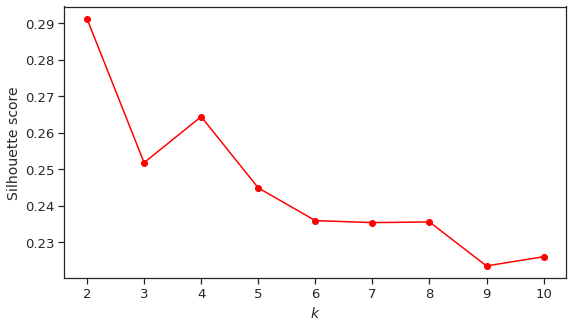

In [167]:
plt.figure(figsize=(9, 5))
plt.plot(range(2, 11), horror_silhouette_scores, "ro-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.savefig("Figures/silhouette_score_vs_k_plot_horror.png")
plt.show()

# Canditate values for k: 2,3,4,5

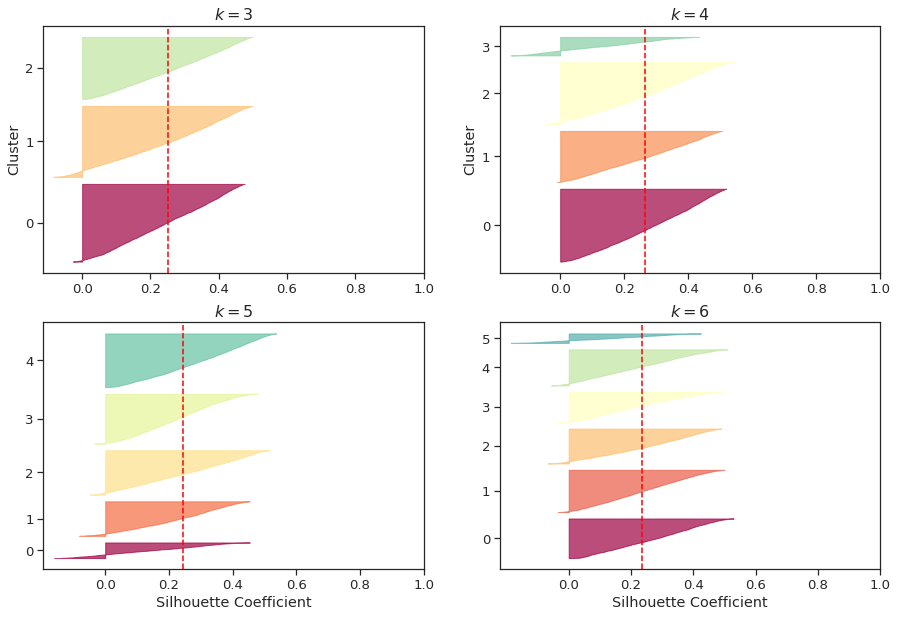

In [218]:
plt.figure(figsize=(15, 10))
n = 0
for k in (3, 4, 5, 6):
    n +=1
    plt.subplot(2, 2, n)
    
    y_pred = horror_kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(horror_reduced, y_pred)

    padding = len(horror_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 4):
        plt.ylabel("Cluster")
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
    if k in (5, 6):
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=horror_silhouette_scores[k-2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.savefig("Figures/silhouette_analysis_plot_horror.png")
plt.show()

k = 4

### Visualizing Clusters

In [204]:
horror_clusters = horror_kmeans_per_k[3]
horror['cluster'] = horror_clusters.labels_

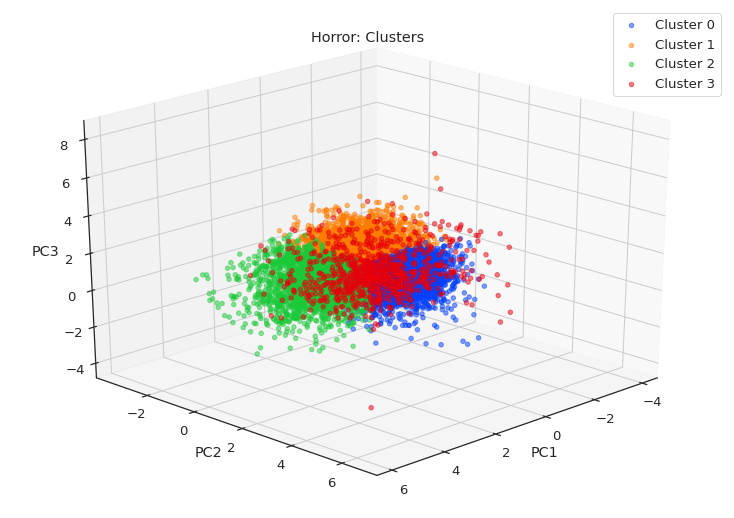

In [221]:
fig = plt.figure(figsize=(10,7))

ax = Axes3D(fig)
# Plotting Cluster 0
x_0 = horror_reduced[horror.cluster == 0].PC1
y_0 = horror_reduced[horror.cluster == 0].PC2
z_0 = horror_reduced[horror.cluster == 0].PC3
ax.scatter(x_0, y_0, z_0, label='Cluster 0', marker='o', alpha=0.5)

# Plotting Cluster 1
x_1 = horror_reduced[horror.cluster == 1].PC1
y_1 = horror_reduced[horror.cluster == 1].PC2
z_1 = horror_reduced[horror.cluster == 1].PC3
ax.scatter(x_1, y_1, z_1, label='Cluster 1', marker='o', alpha=0.5)

# Plotting Cluster 2
x_2 = horror_reduced[horror.cluster == 2].PC1
y_2 = horror_reduced[horror.cluster == 2].PC2
z_2 = horror_reduced[horror.cluster == 2].PC3
ax.scatter(x_2, y_2, z_2, label='Cluster 2', marker='o', alpha=0.5)

# Plotting Cluster 3
x_3 = horror_reduced[horror.cluster == 3].PC1
y_3 = horror_reduced[horror.cluster == 3].PC2
z_3 = horror_reduced[horror.cluster == 3].PC3
ax.scatter(x_3, y_3, z_3, label='Cluster 3', marker='o', alpha=0.5)




ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Horror: Clusters')

ax.view_init(25, 45)

plt.legend()

plt.show()


## Sci-Fi Clustering


### Finding Optimal Numer of Clusters

In [178]:
scifi_kmeans_per_k = [KMeans(n_clusters=k, random_state=69).fit(scifi_reduced) for k in range(1,11)]

scifi_inertias = [model.inertia_ for model in scifi_kmeans_per_k]

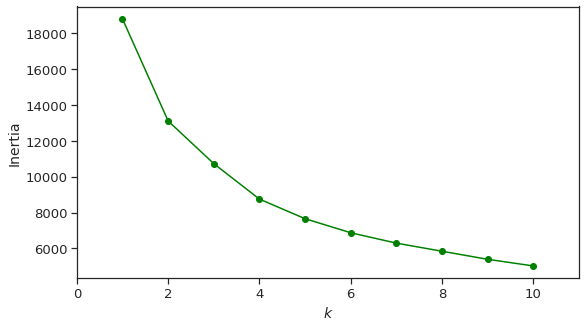

In [181]:
plt.figure(figsize=(9,5))
plt.plot(range(1, 11), scifi_inertias, "go-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(2, scifi_inertias[1]),
#              xytext=(0.4, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.xlim([0, 11])
plt.savefig("Figures/inertia_vs_k_plot_scifi.png")
plt.show()

In [227]:
scifi_silhouette_scores = [round(silhouette_score(scifi_reduced, model.labels_),2) for model in scifi_kmeans_per_k[1:]]
scifi_silhouette_scores

[0.29, 0.25, 0.26, 0.25, 0.23, 0.23, 0.23, 0.23, 0.24]

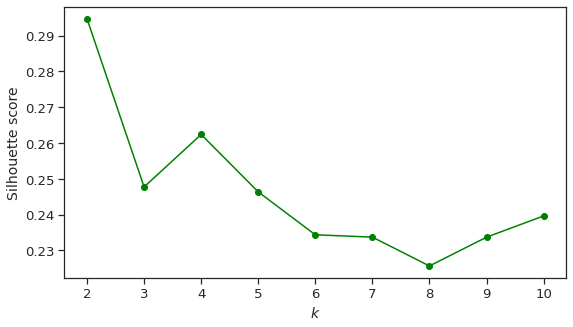

In [182]:
plt.figure(figsize=(9, 5))
plt.plot(range(2, 11), scifi_silhouette_scores, "go-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.savefig("Figures/silhouette_score_vs_k_plot_scifi.png")
plt.show()

# Canditate values for k: 2,3,4,5

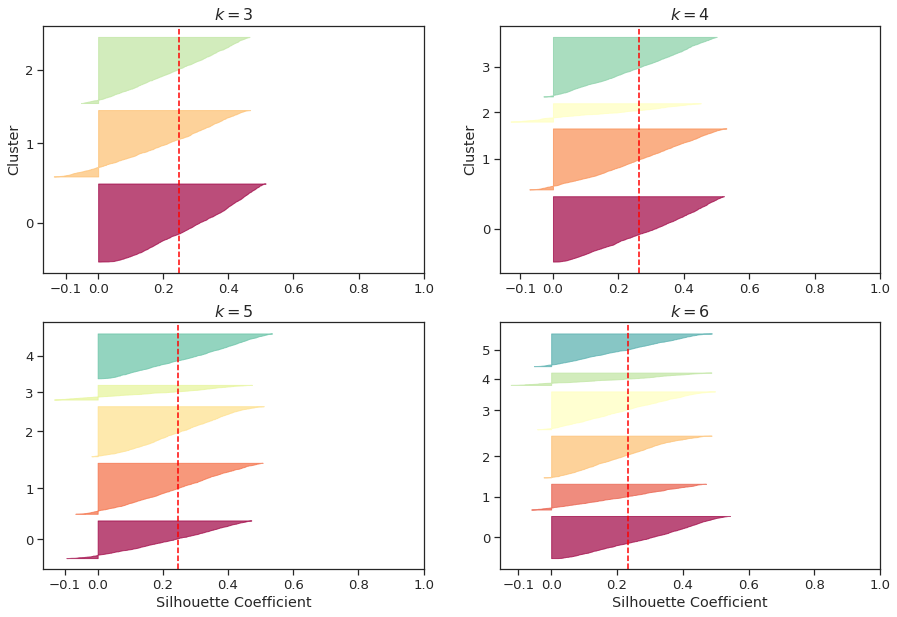

In [219]:
plt.figure(figsize=(15, 10))
n = 0
for k in (3, 4, 5, 6):
    n +=1
    plt.subplot(2, 2, n)
    
    y_pred = scifi_kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(scifi_reduced, y_pred)

    padding = len(scifi_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 4):
        plt.ylabel("Cluster")
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=scifi_silhouette_scores[k-2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.savefig("Figures/silhouette_analysis_plot_scifi.png")
plt.show()

k = 4

### Visualizing Clusters

In [220]:
scifi_clusters = scifi_kmeans_per_k[3]
scifi['cluster'] = scifi_clusters.labels_

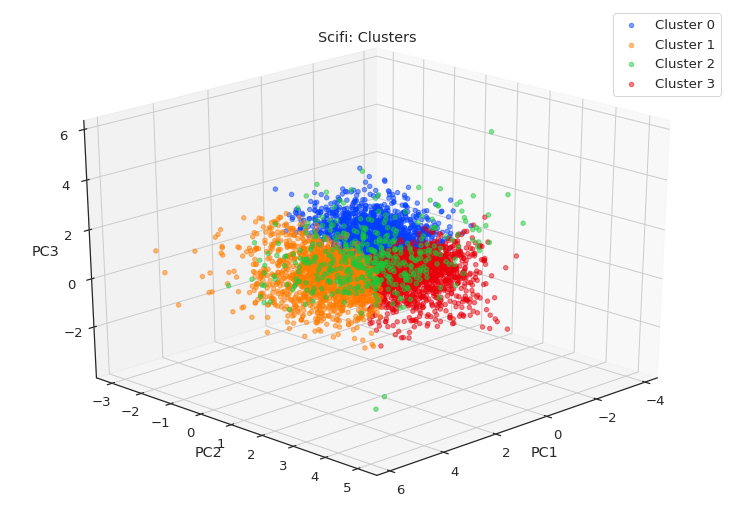

In [222]:
fig = plt.figure(figsize=(10,7))

ax = Axes3D(fig)
# Plotting Cluster 0
x_0 = scifi_reduced[scifi.cluster == 0].PC1
y_0 = scifi_reduced[scifi.cluster == 0].PC2
z_0 = scifi_reduced[scifi.cluster == 0].PC3
ax.scatter(x_0, y_0, z_0, label='Cluster 0', marker='o', alpha=0.5)

# Plotting Cluster 1
x_1 = scifi_reduced[scifi.cluster == 1].PC1
y_1 = scifi_reduced[scifi.cluster == 1].PC2
z_1 = scifi_reduced[scifi.cluster == 1].PC3
ax.scatter(x_1, y_1, z_1, label='Cluster 1', marker='o', alpha=0.5)

# Plotting Cluster 2
x_2 = scifi_reduced[scifi.cluster == 2].PC1
y_2 = scifi_reduced[scifi.cluster == 2].PC2
z_2 = scifi_reduced[scifi.cluster == 2].PC3
ax.scatter(x_2, y_2, z_2, label='Cluster 2', marker='o', alpha=0.5)

# Plotting Cluster 3
x_3 = scifi_reduced[scifi.cluster == 3].PC1
y_3 = scifi_reduced[scifi.cluster == 3].PC2
z_3 = scifi_reduced[scifi.cluster == 3].PC3
ax.scatter(x_3, y_3, z_3, label='Cluster 3', marker='o', alpha=0.5)




ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Scifi: Clusters')

ax.view_init(25, 45)

plt.legend()

plt.show()


## Thriller Clustering

### Finding Optimal Number of Clusters

In [223]:
thriller_kmeans_per_k = [KMeans(n_clusters=k, random_state=69).fit(thriller_reduced) for k in range(1,11)]

thriller_inertias = [model.inertia_ for model in thriller_kmeans_per_k]

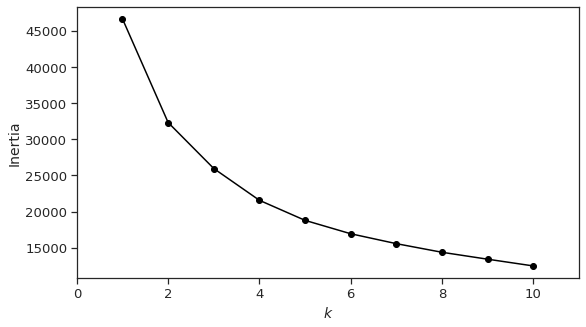

In [224]:
plt.figure(figsize=(9,5))
plt.plot(range(1, 11), thriller_inertias, "ko-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(2, thriller_inertias[1]),
#              xytext=(0.4, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.xlim([0, 11])
plt.savefig("Figures/inertia_vs_k_plot_thriller.png")
plt.show()

In [228]:
thriller_silhouette_scores = [round(silhouette_score(thriller_reduced, model.labels_),2) for model in thriller_kmeans_per_k[1:]]
thriller_silhouette_scores

[0.3, 0.25, 0.27, 0.25, 0.24, 0.23, 0.24, 0.24, 0.23]

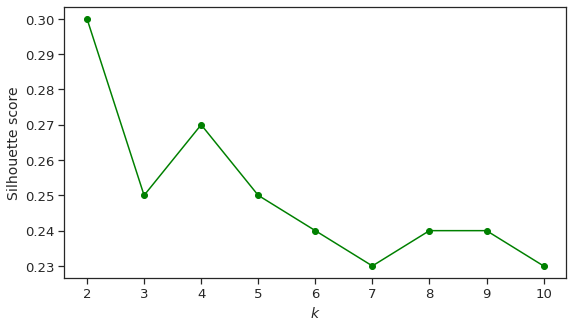

In [229]:
plt.figure(figsize=(9, 5))
plt.plot(range(2, 11), thriller_silhouette_scores, "go-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.savefig("Figures/silhouette_score_vs_k_plot_thriller.png")
plt.show()

# Canditate values for k: 3,4,5,6

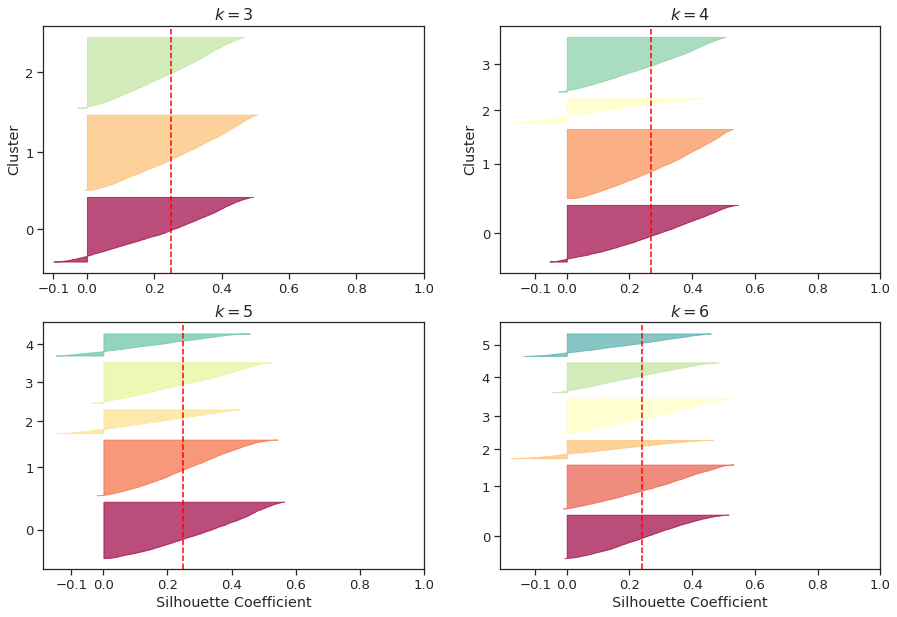

In [230]:
plt.figure(figsize=(15, 10))
n = 0
for k in (3, 4, 5, 6):
    n +=1
    plt.subplot(2, 2, n)
    
    y_pred = thriller_kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(thriller_reduced, y_pred)

    padding = len(thriller_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 4):
        plt.ylabel("Cluster")
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=thriller_silhouette_scores[k-2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.savefig("Figures/silhouette_analysis_plot_thriller.png")
plt.show()

k = 4

### Visualizing Clusters

In [232]:
thriller_clusters = thriller_kmeans_per_k[3]
thriller['cluster'] = thriller_clusters.labels_

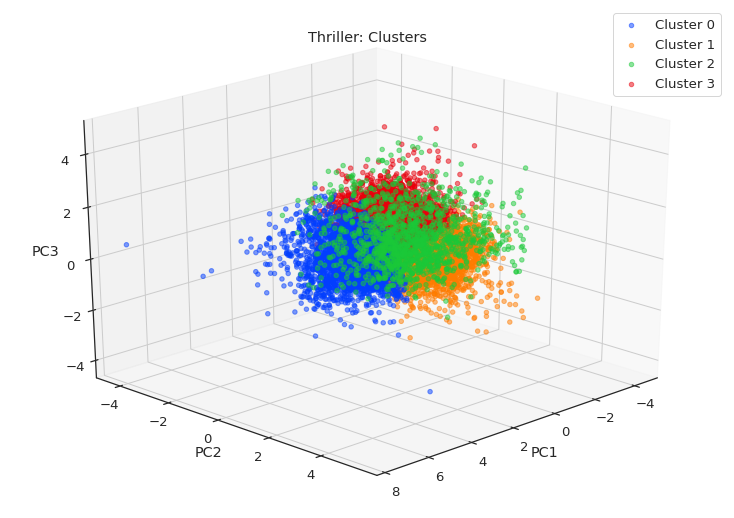

In [233]:
fig = plt.figure(figsize=(10,7))

ax = Axes3D(fig)
# Plotting Cluster 0
x_0 = thriller_reduced[thriller.cluster == 0].PC1
y_0 = thriller_reduced[thriller.cluster == 0].PC2
z_0 = thriller_reduced[thriller.cluster == 0].PC3
ax.scatter(x_0, y_0, z_0, label='Cluster 0', marker='o', alpha=0.5)

# Plotting Cluster 1
x_1 = thriller_reduced[thriller.cluster == 1].PC1
y_1 = thriller_reduced[thriller.cluster == 1].PC2
z_1 = thriller_reduced[thriller.cluster == 1].PC3
ax.scatter(x_1, y_1, z_1, label='Cluster 1', marker='o', alpha=0.5)

# Plotting Cluster 2
x_2 = thriller_reduced[thriller.cluster == 2].PC1
y_2 = thriller_reduced[thriller.cluster == 2].PC2
z_2 = thriller_reduced[thriller.cluster == 2].PC3
ax.scatter(x_2, y_2, z_2, label='Cluster 2', marker='o', alpha=0.5)

# Plotting Cluster 3
x_3 = thriller_reduced[thriller.cluster == 3].PC1
y_3 = thriller_reduced[thriller.cluster == 3].PC2
z_3 = thriller_reduced[thriller.cluster == 3].PC3
ax.scatter(x_3, y_3, z_3, label='Cluster 3', marker='o', alpha=0.5)




ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Thriller: Clusters')

ax.view_init(25, 45)

plt.legend()

plt.show()


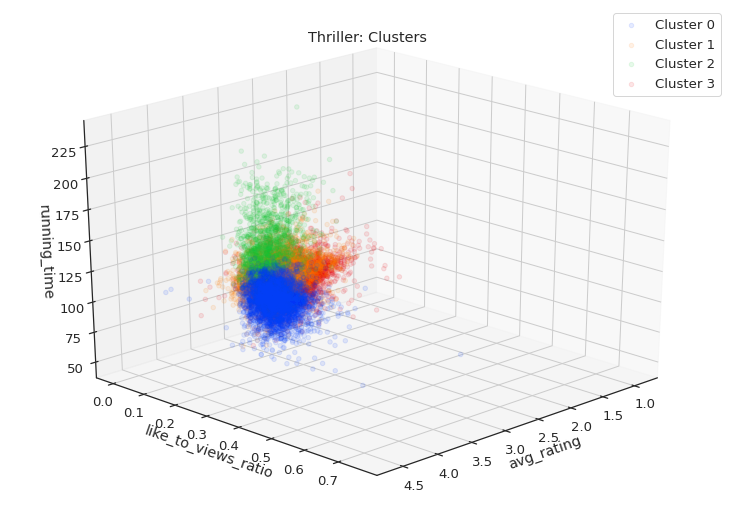

In [242]:
fig = plt.figure(figsize=(10,7))

ax = Axes3D(fig)
# Plotting Cluster 0
x_0 = thriller[thriller.cluster == 0].avg_rating
y_0 = thriller[thriller.cluster == 0].like_to_views_ratio
z_0 = thriller[thriller.cluster == 0].running_time
ax.scatter(x_0, y_0, z_0, label='Cluster 0', marker='o', alpha=0.1)

# Plotting Cluster 1
x_1 = thriller[thriller.cluster == 1].avg_rating
y_1 = thriller[thriller.cluster == 1].like_to_views_ratio
z_1 = thriller[thriller.cluster == 1].running_time
ax.scatter(x_1, y_1, z_1, label='Cluster 1', marker='o', alpha=0.1)

# Plotting Cluster 2
x_2 = thriller[thriller.cluster == 2].avg_rating
y_2 = thriller[thriller.cluster == 2].like_to_views_ratio
z_2 = thriller[thriller.cluster == 2].running_time
ax.scatter(x_2, y_2, z_2, label='Cluster 2', marker='o', alpha=0.1)

# Plotting Cluster 3
x_3 = thriller[thriller.cluster == 3].avg_rating
y_3 = thriller[thriller.cluster == 3].like_to_views_ratio
z_3 = thriller[thriller.cluster == 3].running_time
ax.scatter(x_3, y_3, z_3, label='Cluster 3', marker='o', alpha=0.1)




ax.set_xlabel('avg_rating')
ax.set_ylabel('like_to_views_ratio')
ax.set_zlabel('running_time')
ax.set_title('Thriller: Clusters')

ax.view_init(25, 45)

plt.legend()

plt.show()